# What is the impact of agricultural corn field expansion rate on deforestation rate in countries?


By Platypus

## About Corn Production
### History of Corn
The most commonly accepted theory is that maize, also known as corn nowadays,  was originated in the Mesoamerican region, now called Mexico and Central America. A study by Matsuoka et al. (2002) has demonstrated that maize arose from a single domestication in Southern Mexico about 9000 years ago. The term ‘maize’ come from the word ‘mahiz’ of Taino language of the Caribbean islands, which became ‘maiz’, a word brought by Columbus from the Carribean to Spain. Domesticated corn would not exist if it was not for the humans who cultivated and developed it. The most published hypothesis about its wild progenitor : teosinte hypothesis. Teosinte provided a useful food source and ancient people cultivated it. It eventually muted into the solid ear type of maize that we know today. 

Source : [Hossain, Firoz & Muthusamy, Vignesh & Bhat, Jayant & Jha, Shailendra & Zunjare, Rajkumar & Das, Abhijit & Sarika, Konsam & Kumar, Rajesh. (2016).](https://www.researchgate.net/publication/308086213_Maize)

### How it spread worldwide and its importance in global agriculture
From Mexico maize spread north into the Southwestern United States and south down the coast to Peru. About 1000 years ago, as Indian people migrated north to the eastern woodlands of present day North America, they brought corn with them. After the discovery of the Americas, corn quickly disseminated into Europe, Asia, and Africa, and has become the leading global staple cereal in terms of annual production exceeding 1 billion metric tons. 

Source : [Olaf Erenstein & Moti Jaleta & Kai Sonder & Khondoker Mottaleb & B.M. Prasanna, 2022.
"Global maize production, consumption and trade: trends and R&D implications," Food Security: The Science, Sociology and Economics of Food Production and Access to Food, Springer;The International Society for Plant Pathology, vol. 14(5), pages 1295-1319, October.](https://link.springer.com/content/pdf/10.1007/s12571-022-01288-7.pdf)



In [284]:
# CSV files
csv_forest = "./Data/Deforest.xlsx"
csv_cornland = './Data/FAOSTAT_data_en_10-2-2024.csv'
csv_landcover = "./Data/FAOSTAT_data_en_11-18-2024.csv"

## Getting the Data

### Installing packages

In [285]:
pip install wbdata

Note: you may need to restart the kernel to use updated packages.


In [286]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [287]:
pip install country_converter

Note: you may need to restart the kernel to use updated packages.


### Import libraries

In [288]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import wbdata
import numpy as np
import pycountry
import plotly.express as px
import country_converter as coco

### Deforestation Data

In [289]:
deforest_data = pd.read_excel(csv_forest)
deforest_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,NaN,NaN
1,Africa Eastern and Southern,AFE,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.470634,31.260420,31.039682,30.824316,30.611512,30.391626,30.174253,29.955194,NaN,NaN
2,Afghanistan,AFG,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,NaN,NaN
3,Africa Western and Central,AFW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.322187,20.234231,20.152610,20.071327,19.986100,19.901215,19.816777,19.732037,NaN,NaN
4,Angola,AGO,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,56.098301,55.653076,55.207845,54.762629,54.317406,53.872175,53.426951,52.981722,NaN,NaN


In [290]:
# Check if there is a columns only filled with 0
zero_counts = (deforest_data == 0).sum()
zero_counts.unique() #nb of unique rows only filled with 0 

array([0, 4], dtype=int64)

In [291]:
# Define the columns containing years
year_columns = [col for col in deforest_data.columns if col.isdigit()]

# Count the number of 0 values in each row across the year columns
deforest_data['Zero_Count'] = (deforest_data[year_columns] == 0).sum(axis=1)

# Filter rows where the count of 0 values is greater than a threshold (e.g., more than 1)
countries_with_multiple_zeros = deforest_data[deforest_data['Zero_Count'] > 1]['Country Name']

# Display the country names with multiple 0 values
print(countries_with_multiple_zeros)


84     Gibraltar
149       Monaco
179        Nauru
200        Qatar
Name: Country Name, dtype: object


In [292]:
# Drop the rows where 'Country Name' is in the list of countries with multiple zeros
deforest_data = deforest_data[~deforest_data['Country Name'].isin(countries_with_multiple_zeros)]

# Drop the 'Zero_Count' column used for filtering
deforest_data = deforest_data.drop(columns=['Zero_Count'])

deforest_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,NaN,NaN
1,Africa Eastern and Southern,AFE,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.470634,31.260420,31.039682,30.824316,30.611512,30.391626,30.174253,29.955194,NaN,NaN
2,Afghanistan,AFG,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,NaN,NaN
3,Africa Western and Central,AFW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.322187,20.234231,20.152610,20.071327,19.986100,19.901215,19.816777,19.732037,NaN,NaN
4,Angola,AGO,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,56.098301,55.653076,55.207845,54.762629,54.317406,53.872175,53.426951,52.981722,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,NaN,NaN
263,South Africa,ZAF,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,14.235127,14.205121,14.175115,14.145109,14.115103,14.085097,14.055091,14.025085,NaN,NaN
264,Zambia,ZMB,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,61.802392,61.549254,61.295955,61.042885,60.789707,60.536515,60.283337,60.030150,NaN,NaN


In [293]:
#Dropping the column that are not necessary for the analysis
data_topic = deforest_data["Indicator Name"].unique()[0]
deforest_data = deforest_data.drop(["Indicator Name","Indicator Code"], axis = 1) #Dropping the column
print(f"Dataset topic: {data_topic}")

Dataset topic: Forest area (% of land area)


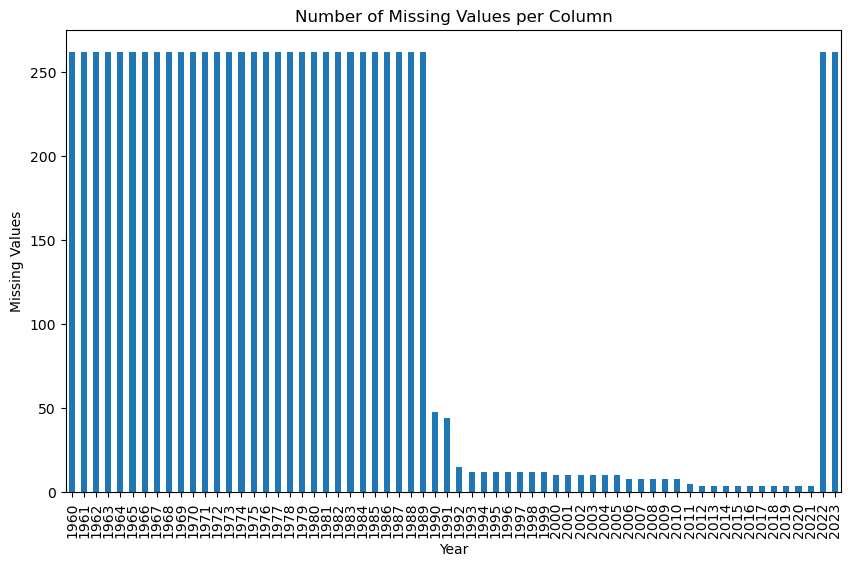

In [294]:
#Historigram to see the nb of missing values per columns
# We will use regex to find all columns that represent years (assuming years are 4-digit numbers starting with '19' or '20').
year_columns = [col for col in deforest_data.columns if re.match(r'^\d{4}$', col)]

#Potting the missing values
plt.figure(figsize=(10, 6))  # You can adjust the (width, height) as needed
missing_values = deforest_data[year_columns].isnull().sum()
missing_values.plot(kind='bar', title='Number of Missing Values per Column', xlabel='Year', ylabel='Missing Values')

# Show the plot
plt.show()

In [295]:
all_missing_columns = deforest_data[year_columns].isnull().all()
# Filter out the columns that are entirely missing
columns_with_all_missing = all_missing_columns[all_missing_columns].index.tolist()
# Result: We don't have data for the years: 1960-1989 & 2022,2023

# Drop the columns that have all missing value 
deforest_data = deforest_data.drop(columns_with_all_missing ,axis = 1)

#Converting the years to integers
deforest_data.rename(columns={col: int(col) for col in year_columns}, inplace=True)

#We want the data starting from 2000
columns_from_2000 = [col for col in deforest_data.columns if isinstance(col, int) and col >= 2000]

# Filter the DataFrame to include only the columns from the year 2000 onwards
data_with_desired_years = deforest_data[columns_from_2000]

#Joining the dataframes
final_deforest_data = deforest_data[["Country Name","Country Code"]].join(data_with_desired_years)
final_deforest_data.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333
1,Africa Eastern and Southern,AFE,34.717473,34.537463,34.357452,34.177441,33.654274,33.475977,33.297802,33.119504,...,31.890654,31.680635,31.470634,31.260420,31.039682,30.824316,30.611512,30.391626,30.174253,29.955194
2,Afghanistan,AFG,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782
3,Africa Western and Central,AFW,21.595284,21.503156,21.411029,21.318902,21.226775,21.134648,21.042520,20.950393,...,20.498099,20.410143,20.322187,20.234231,20.152610,20.071327,19.986100,19.901215,19.816777,19.732037
4,Angola,AGO,62.331443,61.886219,61.440995,60.995770,60.550546,60.105322,59.660098,59.214874,...,56.988751,56.543526,56.098301,55.653076,55.207845,54.762629,54.317406,53.872175,53.426951,52.981722


In [296]:
#Preliminary cleaning
final_deforest_data["Country Name"] = final_deforest_data["Country Name"] + " " + final_deforest_data["Country Code"]
final_deforest_data.reset_index(drop = True, inplace = True)

#Dropping some of the columns for clearer structure
df_cleaned = final_deforest_data.drop(columns='Country Code')

# Reshape the data using the melt function to create a long format
df_long = df_cleaned.melt(id_vars=['Country Name'], var_name='Year', value_name='Values')

# Convert 'Year' column to numeric if necessary (remove '.0' from the years)
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')

#Adding the country code
df_long["Country Code"] = df_long["Country Name"].apply(lambda val:val.split(" ")[-1])
df_long["Country Name"] = df_long["Country Name"].apply(lambda val: " ".join(val.split(" ")[:-1]))

#Ordering the columns
df_long = df_long[["Country Name","Country Code","Year","Values"]]

df_long.head()

,Country Name,Country Code,Year,Values
0,Aruba,ABW,2000,2.333333
1,Africa Eastern and Southern,AFE,2000,34.717473
2,Afghanistan,AFG,2000,1.852782
3,Africa Western and Central,AFW,2000,21.595284
4,Angola,AGO,2000,62.331443


C:\Users\Mert\AppData\Local\Temp\ipykernel_15376\1281065338.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



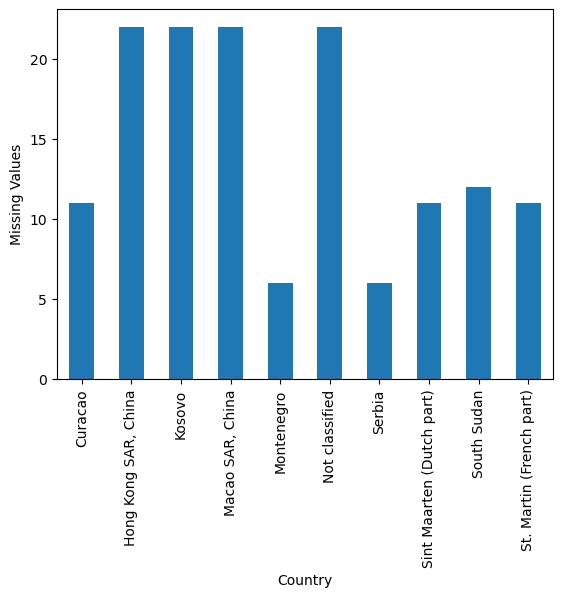

In [297]:
# Count the number of NaN values for each country
nan_count_per_country = df_long.groupby('Country Name').apply(lambda x: x.isna().sum())["Values"]

# Plot a bar plot of the 'nan_count_per_country' DataFrame
nan_count_per_country[nan_count_per_country > 0].plot(kind = 'bar', xlabel='Country', ylabel='Missing Values')

#These countries can be dropped
countries_dropped = nan_count_per_country[nan_count_per_country > 0].index


In [298]:
country_lst = nan_count_per_country[nan_count_per_country > 0].index.to_list()

#Dropping all the data related to countries above
df_cleaned = df_long[~df_long['Country Name'].isin(country_lst)]
df_cleaned.head()

,Country Name,Country Code,Year,Values
0,Aruba,ABW,2000,2.333333
1,Africa Eastern and Southern,AFE,2000,34.717473
2,Afghanistan,AFG,2000,1.852782
3,Africa Western and Central,AFW,2000,21.595284
4,Angola,AGO,2000,62.331443


In [299]:
#Data availability per country
data_avl = df_cleaned.groupby("Country Name").count()["Values"].unique()[0] #Data point per country
print(f"Data point per country: {data_avl}")

Data point per country: 22


c:\Users\Mert\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



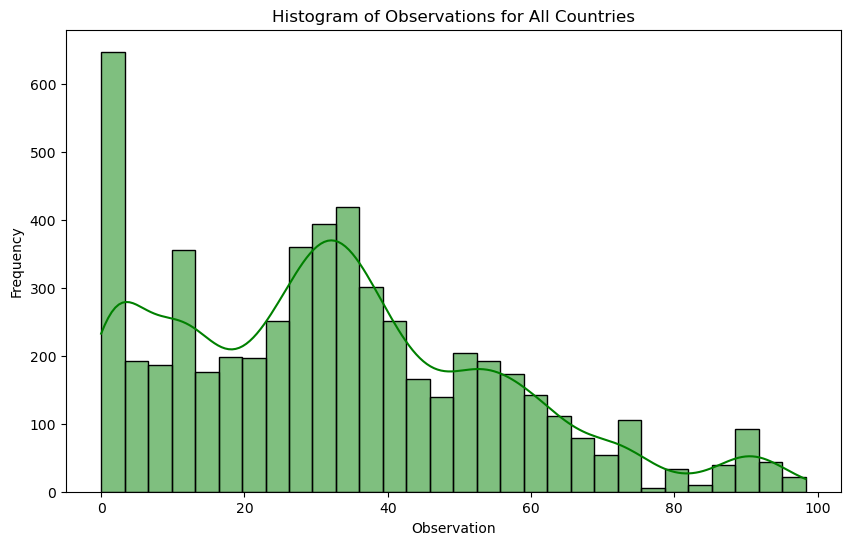

In [300]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["Values"], bins=30, kde=True, color='green')
plt.title('Histogram of Observations for All Countries')
plt.xlabel('Observation')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [301]:
df_cleaned["Values"].skew()

0.5836839696069517

In [302]:
# Function to get ISO-3 country code from country name
def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

In [303]:
df_cleaned['iso3'] = df_cleaned['Country Name'].apply(get_iso3)
df_cleaned

C:\Users\Mert\AppData\Local\Temp\ipykernel_15376\3388532243.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country Name,Country Code,Year,Values,iso3
0,Aruba,ABW,2000,2.333333,ABW
1,Africa Eastern and Southern,AFE,2000,34.717473,None
2,Afghanistan,AFG,2000,1.852782,AFG
3,Africa Western and Central,AFW,2000,21.595284,None
4,Angola,AGO,2000,62.331443,AGO
...,...,...,...,...,...
5758,Samoa,WSM,2021,57.982014,WSM
5760,"Yemen, Rep.",YEM,2021,1.039832,None
5761,South Africa,ZAF,2021,14.025085,ZAF
5762,Zambia,ZMB,2021,60.030150,ZMB


In [304]:
df_cleaned[df_cleaned['iso3'].isnull()]

,Country Name,Country Code,Year,Values,iso3
1,Africa Eastern and Southern,AFE,2000,34.717473,None
3,Africa Western and Central,AFW,2000,21.595284,None
7,Arab World,ARB,2000,3.551072,None
23,"Bahamas, The",BHS,2000,50.935065,None
36,Central Europe and the Baltics,CEB,2000,32.469472,None
...,...,...,...,...,...
5751,St. Vincent and the Grenadines,VCT,2021,73.179487,None
5752,"Venezuela, RB",VEN,2021,52.347781,None
5754,Virgin Islands (U.S.),VIR,2021,57.314286,None
5757,World,WLD,2021,31.177049,None


In [305]:
# Reverting to previous data before dropping and then manually resolving country mismatches
country_mapping = {
    'United Republic of Tanzania': 'Tanzania',
    'United States of America': 'United States',
    'Venezuela, RB': 'Venezuela',
    'Bahamas, The': 'Bahamas',
    'Congo, Dem. Rep.':'Congo, The Democratic Republic of the',
    'Congo, Rep.': 'Congo',
    'Turkiye': 'Türkiye',
    "Cote d'Ivoire":"Côte d'Ivoire",
    'St. Lucia':'Saint Lucia',
    "Korea, Dem. People's Rep." : "Korea, Democratic People's Republic of",
    'Korea, Rep.': 'Korea, Republic of',
    'Lao PDR':"Lao People's Democratic Republic",
    'Gambia, The': 'Gambia',
    'Egypt, Arab Rep.': 'Egypt',
    'Iran, Islamic Rep.': 'Iran, Islamic Republic of',
    'St. Kitts and Nevis': 'Saint Kitts and Nevis',
    'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
    'Micronesia, Fed. Sts.': 'Micronesia, Federated States of',
    'Virgin Islands (U.S.)':'Virgin Islands, U.S.',
    'Yemen, Rep.':'Yemen',
    'Macao SAR, China': 'Macao',
    'St. Martin (French part)':'Saint Martin (French part)',
    'Curacao':'Curaçao',
    'Hong Kong SAR, China': 'Hong Kong'
    # You can add more mappings if necessary
}
df_cleaned['Country Name'] = df_cleaned['Country Name'].replace(country_mapping)

C:\Users\Mert\AppData\Local\Temp\ipykernel_15376\692176500.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [306]:
# Lookup the country by ISO3 code
country = pycountry.countries.get(alpha_3='HKG')

# Display the country name
country.name

'Hong Kong'

In [307]:
country_not_country = [
    'Africa Eastern and Southern', 
    'Africa Western and Central',
    'Central Europe and the Baltics',
    'Upper middle income',
    'East Asia & Pacific (IDA & IBRD countries)',
    'East Asia & Pacific',
    'East Asia & Pacific (excluding high income)',
    'Euro area',
    'Europe & Central Asia',
    'Europe & Central Asia (IDA & IBRD countries)',
    'Europe & Central Asia (excluding high income)',
    'European Union',
    'Fragile and conflict affected situations',
    'Heavily indebted poor countries (HIPC)',
    'Early-demographic dividend',
    'High income',
    'IBRD only',
    'IDA & IBRD total',
    'IDA blend',
    'IDA only',
    'IDA total',
    'Late-demographic dividend',
    'Latin America & Caribbean',
    'Latin America & Caribbean (excluding high income)',
    'Least developed countries: UN classification',
    'Low & middle income',
    'Lower middle income',
    'Middle East & North Africa',
    'Middle East & North Africa (IDA & IBRD countries)',
    'Middle income',
    'Low income',
    'North America',
    'OECD members',
    'Other small states',
    'Pacific island small states',
    'Post-demographic dividend',
    'Small states',
    'South Asia',
    'Sub-Saharan Africa (IDA & IBRD countries)',
    'Sub-Saharan Africa (excluding high income)',
    'Pre-demographic dividend',
    'South Asia (IDA & IBRD)',
    'Sub-Saharan Africa',
    'West Bank and Gaza',
    'Caribbean small states',
    'Channel Islands',
    'Arab World',
    'Middle East & North Africa (excluding high income)',
    'Latin America & the Caribbean (IDA & IBRD countries)',
    'Eastern and Southern Africa',
    'Western and Central Africa',
    'Not classified',
    'World'
]

df_cleaned = df_cleaned[~df_cleaned['Country Name'].isin(country_not_country)]

In [308]:
df_cleaned['iso3'] = df_cleaned['Country Name'].apply(get_iso3)

C:\Users\Mert\AppData\Local\Temp\ipykernel_15376\1747897946.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [309]:
#Check that we have no country mismatch anymore
df_cleaned[df_cleaned['iso3'].isnull()]

,Country Name,Country Code,Year,Values,iso3


In [310]:
df_cleaned = df_cleaned.dropna()
df_cleaned = df_cleaned.reset_index()
df_def = df_cleaned
df_def.head()

,index,Country Name,Country Code,Year,Values,iso3
0,0,Aruba,ABW,2000,2.333333,ABW
1,2,Afghanistan,AFG,2000,1.852782,AFG
2,4,Angola,AGO,2000,62.331443,AGO
3,5,Albania,ALB,2000,28.076642,ALB
4,6,Andorra,AND,2000,34.042553,AND


In [311]:
df_def.drop('index', axis=1, inplace=True)

In [312]:
df_def.rename(columns={'Values':'% of Forest Area', 'Country Name': 'country'}, inplace=True)
df_def.head()

,country,Country Code,Year,% of Forest Area,iso3
0,Aruba,ABW,2000,2.333333,ABW
1,Afghanistan,AFG,2000,1.852782,AFG
2,Angola,AGO,2000,62.331443,AGO
3,Albania,ALB,2000,28.076642,ALB
4,Andorra,AND,2000,34.042553,AND


c:\Users\Mert\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



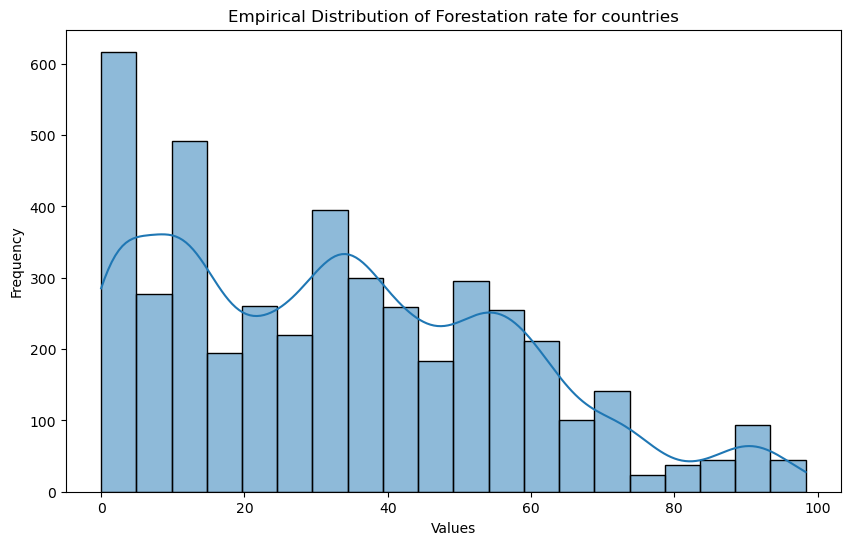

In [313]:
plt.figure(figsize=(10,6))
sns.histplot(df_def['% of Forest Area'], bins=20, kde=True, edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Forestation rate for countries')

# Show the plot
plt.show()

In [314]:
df_def['% of Forest Area'].skew()

0.5032493738541235

In [315]:
print(df_def['Year'].min(),df_def['Year'].max())

2000 2021


### Cornfield Data

In [316]:
corn_field_data = pd.read_csv(csv_cornland)
corn_field_data.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1961,1961,ha,500000,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1962,1962,ha,500000,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1963,1963,ha,500000,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1964,1964,ha,505000,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1965,1965,ha,500000,A,Official figure,NaN


In [317]:
#Filtering the data between 2000 and 2021
corn_field_data = corn_field_data[(corn_field_data['Year'] >= 2000) & (corn_field_data['Year'] <= 2021)]
corn_field_data.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
39,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2000,2000,ha,96000,A,Official figure,NaN
40,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2001,2001,ha,80000,A,Official figure,NaN
41,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2002,2002,ha,100000,A,Official figure,NaN
42,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2003,2003,ha,250000,A,Official figure,NaN
43,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2004,2004,ha,250000,A,Official figure,NaN


In [318]:
corn_field_data["Note"].unique()

array([nan, 'Unofficial figure'], dtype=object)

In [319]:
corn_field_data["Flag Description"].unique()

array(['Official figure', 'Estimated value', 'Imputed value',
       'Figure from international organizations',
       'Missing value (data cannot exist, not applicable)'], dtype=object)

In [320]:
corn_field_data = corn_field_data[(corn_field_data["Flag Description"] == "Official figure") & (corn_field_data["Note"] != "Unofficial figure")]

In [321]:
#Unique country amount: Does the number of countires in this data match with deforestation data?
print("Number of countries in the corn field dataset: ",len(corn_field_data["Area"].unique()))

Number of countries in the corn field dataset:  162


In [322]:
corn_field_data.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
39,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2000,2000,ha,96000,A,Official figure,NaN
40,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2001,2001,ha,80000,A,Official figure,NaN
41,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2002,2002,ha,100000,A,Official figure,NaN
42,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2003,2003,ha,250000,A,Official figure,NaN
43,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2004,2004,ha,250000,A,Official figure,NaN


In [323]:
#filter only the relevant columns
df_corn = corn_field_data
df_corn = df_corn[["Area","Value","Year"]]
df_corn

,Area,Value,Year
39,Afghanistan,96000,2000
40,Afghanistan,80000,2001
41,Afghanistan,100000,2002
42,Afghanistan,250000,2003
43,Afghanistan,250000,2004
...,...,...,...
9543,Zimbabwe,1099945,2017
9544,Zimbabwe,1155075,2018
9545,Zimbabwe,991354,2019
9546,Zimbabwe,1018884,2020


In [324]:
areas_to_exclude = df_corn[df_corn["Value"] == 0]["Area"].unique() #These countries include 0 values
#Exclude these countries completely
df_corn = df_corn[~df_corn['Area'].isin(areas_to_exclude)]
df_corn

,Area,Value,Year
39,Afghanistan,96000,2000
40,Afghanistan,80000,2001
41,Afghanistan,100000,2002
42,Afghanistan,250000,2003
43,Afghanistan,250000,2004
...,...,...,...
9543,Zimbabwe,1099945,2017
9544,Zimbabwe,1155075,2018
9545,Zimbabwe,991354,2019
9546,Zimbabwe,1018884,2020


In [325]:
#Missing values
df_corn.isna().sum()

Area     0
Value    0
Year     0
dtype: int64

In [326]:
value_counts_per_area = df_corn.groupby("Area")["Value"].count()

# Filter to get only the areas where the count is not equal to 22
areas_not_equal_to_22 = value_counts_per_area[value_counts_per_area != 22].index
areas_not_equal_to_22

Index(['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Congo',
       'Côte d'Ivoire', 'Democratic People's Republic of Korea',
       'Democratic Republic of the Congo', 'Denmark', 'Eritrea', 'Eswatini',
       'Fiji', 'French Guiana', 'Gambia', 'Ghana', 'Guatemala',
       'Guinea-Bissau', 'Haiti', 'Honduras', 'Indonesia',
       'Iran (Islamic Republic of)', 'Iraq', 'Israel', 'Japan', 'Kuwait',
       'Lebanon', 'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malaysia',
       'Maldives', 'Mauritania', 'Montenegro', 'Mozambique', 'Namibia',
       'New Caledonia', 'Nigeria', 'Oman', 'Papua New Guinea', 'Puerto Rico',
       'Rwanda', 'Saint Vincent and the Grenadines', 'Saudi Arabia', 'Serbia',
       'Serbia and Montenegro', 'Sierra Leone', 'South Sudan', 'Sri Lanka',
       'Sudan', 'Sudan (former)', 'Sweden', 'Tajikistan', 'Thailand',
 

In [327]:
df_corn = df_corn[~df_corn["Area"].isin(areas_not_equal_to_22)]
df_corn

,Area,Value,Year
39,Afghanistan,96000,2000
40,Afghanistan,80000,2001
41,Afghanistan,100000,2002
42,Afghanistan,250000,2003
43,Afghanistan,250000,2004
...,...,...,...
9481,Zambia,1433944,2017
9482,Zambia,1086006,2018
9483,Zambia,841693,2019
9484,Zambia,1333519,2020


In [328]:
df_corn['iso3'] = df_corn['Area'].apply(get_iso3)
df_corn[df_corn['iso3'].isnull()]

C:\Users\Mert\AppData\Local\Temp\ipykernel_15376\3983791102.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Area,Value,Year,iso3
1057,Bolivia (Plurinational State of),307292,2000,None
1058,Bolivia (Plurinational State of),306118,2001,None
1059,Bolivia (Plurinational State of),310465,2002,None
1060,Bolivia (Plurinational State of),295509,2003,None
1061,Bolivia (Plurinational State of),313849,2004,None
...,...,...,...,...
7175,Republic of Korea,15074,2017,None
7176,Republic of Korea,15472,2018,None
7177,Republic of Korea,14840,2019,None
7178,Republic of Korea,15633,2020,None


In [329]:
# Reverting to previous data before dropping and then manually resolving country mismatches
country_mapping_corn = {
    'Bolivia (Plurinational State of)':'Bolivia, Plurinational State of',
    'China, Taiwan Province of':'Taiwan, Province of China',
    'China, mainland':'China',
    'Democratic Republic of the Congo':'Congo, The Democratic Republic of the',
    'Iran (Islamic Republic of)':'Iran, Islamic Republic of',
    'Micronesia (Federated States of)': 'Micronesia, Federated States of',
    'Netherlands (Kingdom of the)':'Netherlands',
    'Republic of Korea': 'Korea, Republic of',
    'Venezuela (Bolivarian Republic of)':'Venezuela, Bolivarian Republic of',
    # You can add more mappings if necessary
}

df_corn['Area'] = df_corn['Area'].replace(country_mapping_corn)

C:\Users\Mert\AppData\Local\Temp\ipykernel_15376\1487065112.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [330]:
df_corn['iso3'] = df_corn['Area'].apply(get_iso3)
df_corn[df_corn['iso3'].isnull()]

C:\Users\Mert\AppData\Local\Temp\ipykernel_15376\3983791102.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Area,Value,Year,iso3


In [331]:
df_corn = df_corn.reset_index()
df_corn.drop('index', axis=1, inplace=True)
df_corn.rename(columns={'Area':'country', 'Value':'Total Size Cornfield in ha'}, inplace=True)
df_corn['Total Size Cornfield in sq km'] = df_corn['Total Size Cornfield in ha']*0.01
df_corn.head()

,country,Total Size Cornfield in ha,Year,iso3,Total Size Cornfield in sq km
0,Afghanistan,96000,2000,AFG,960.0
1,Afghanistan,80000,2001,AFG,800.0
2,Afghanistan,100000,2002,AFG,1000.0
3,Afghanistan,250000,2003,AFG,2500.0
4,Afghanistan,250000,2004,AFG,2500.0


### Land size

In [332]:
# Get data for 'Land area (sq. km)' for all countries
indicators = {'AG.LND.TOTL.K2': 'Land area (sq. km)'}
data = wbdata.get_dataframe(indicators)

# Display the land area for all countries
org_data = data.reset_index()

#Converting the year column to integer
org_data['date'] = org_data['date'].astype(int)

org_data.head()

,country,date,Land area (sq. km)
0,Africa Eastern and Southern,2023,NaN
1,Africa Eastern and Southern,2022,NaN
2,Africa Eastern and Southern,2021,1.484509e+07
3,Africa Eastern and Southern,2020,1.484509e+07
4,Africa Eastern and Southern,2019,1.484513e+07


In [333]:
filtered_data = org_data[(org_data['date'] >= 2000) & (org_data['date'] <= 2021)]

avg_land_size_df = filtered_data
avg_land_size_df

,country,date,Land area (sq. km)
2,Africa Eastern and Southern,2021,1.484509e+07
3,Africa Eastern and Southern,2020,1.484509e+07
4,Africa Eastern and Southern,2019,1.484513e+07
5,Africa Eastern and Southern,2018,1.484512e+07
6,Africa Eastern and Southern,2017,1.484510e+07
...,...,...,...
16979,Zimbabwe,2004,3.868500e+05
16980,Zimbabwe,2003,3.868500e+05
16981,Zimbabwe,2002,3.868500e+05
16982,Zimbabwe,2001,3.868500e+05


In [334]:
avg_land_size_df['iso3'] = avg_land_size_df['country'].apply(get_iso3)

C:\Users\Mert\AppData\Local\Temp\ipykernel_15376\1108197642.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [335]:
avg_land_size_df[avg_land_size_df['iso3'].isnull()]

,country,date,Land area (sq. km),iso3
2,Africa Eastern and Southern,2021,1.484509e+07,None
3,Africa Eastern and Southern,2020,1.484509e+07,None
4,Africa Eastern and Southern,2019,1.484513e+07,None
5,Africa Eastern and Southern,2018,1.484512e+07,None
6,Africa Eastern and Southern,2017,1.484510e+07,None
...,...,...,...,...
16851,"Yemen, Rep.",2004,5.279700e+05,None
16852,"Yemen, Rep.",2003,5.279700e+05,None
16853,"Yemen, Rep.",2002,5.279700e+05,None
16854,"Yemen, Rep.",2001,5.279700e+05,None


In [336]:
avg_land_size_df['country'] = avg_land_size_df['country'].replace(country_mapping)

C:\Users\Mert\AppData\Local\Temp\ipykernel_15376\344355826.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [337]:
avg_land_size_df = avg_land_size_df[~avg_land_size_df['country'].isin(country_not_country)]

In [338]:
avg_land_size_df['iso3'] = avg_land_size_df['country'].apply(get_iso3)
avg_land_size_df[avg_land_size_df['iso3'].isnull()]

C:\Users\Mert\AppData\Local\Temp\ipykernel_15376\724237593.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,date,Land area (sq. km),iso3
9858,Kosovo,2021,NaN,None
9859,Kosovo,2020,NaN,None
9860,Kosovo,2019,NaN,None
9861,Kosovo,2018,NaN,None
9862,Kosovo,2017,NaN,None
9863,Kosovo,2016,NaN,None
9864,Kosovo,2015,NaN,None
9865,Kosovo,2014,NaN,None
9866,Kosovo,2013,NaN,None
9867,Kosovo,2012,NaN,None


In [339]:
avg_land_size_df = avg_land_size_df.dropna(subset=['iso3'])
avg_land_size_df.head()

,country,date,Land area (sq. km),iso3
3138,Afghanistan,2021,652230.0,AFG
3139,Afghanistan,2020,652230.0,AFG
3140,Afghanistan,2019,652230.0,AFG
3141,Afghanistan,2018,652230.0,AFG
3142,Afghanistan,2017,652230.0,AFG


In [340]:
avg_land_size_df = avg_land_size_df.reset_index()
avg_land_size_df.drop('index', axis=1, inplace=True)
avg_land_size_df.rename(columns={'Land area (sq. km)':'landArea','date':'Year'}, inplace=True)
avg_land_size_df.head()

,country,Year,landArea,iso3
0,Afghanistan,2021,652230.0,AFG
1,Afghanistan,2020,652230.0,AFG
2,Afghanistan,2019,652230.0,AFG
3,Afghanistan,2018,652230.0,AFG
4,Afghanistan,2017,652230.0,AFG


### Create a table containing the x,y and heterogeneity variable

In [341]:
avg_land_size_df.head()

,country,Year,landArea,iso3
0,Afghanistan,2021,652230.0,AFG
1,Afghanistan,2020,652230.0,AFG
2,Afghanistan,2019,652230.0,AFG
3,Afghanistan,2018,652230.0,AFG
4,Afghanistan,2017,652230.0,AFG


In [342]:
df_corn.head()

,country,Total Size Cornfield in ha,Year,iso3,Total Size Cornfield in sq km
0,Afghanistan,96000,2000,AFG,960.0
1,Afghanistan,80000,2001,AFG,800.0
2,Afghanistan,100000,2002,AFG,1000.0
3,Afghanistan,250000,2003,AFG,2500.0
4,Afghanistan,250000,2004,AFG,2500.0


In [343]:
df_def.head()

,country,Country Code,Year,% of Forest Area,iso3
0,Aruba,ABW,2000,2.333333,ABW
1,Afghanistan,AFG,2000,1.852782,AFG
2,Angola,AGO,2000,62.331443,AGO
3,Albania,ALB,2000,28.076642,ALB
4,Andorra,AND,2000,34.042553,AND


In [344]:
final_merged_df = pd.merge(avg_land_size_df, df_corn, on=['iso3', 'Year'], how='outer')
final_merged_df = pd.merge(final_merged_df, df_def, on=['iso3', 'Year'], how='outer')

final_merged_df.head()

,country_x,Year,landArea,iso3,country_y,Total Size Cornfield in ha,Total Size Cornfield in sq km,country,Country Code,% of Forest Area
0,Aruba,2000,180.0,ABW,NaN,NaN,NaN,Aruba,ABW,2.333333
1,Aruba,2001,180.0,ABW,NaN,NaN,NaN,Aruba,ABW,2.333333
2,Aruba,2002,180.0,ABW,NaN,NaN,NaN,Aruba,ABW,2.333333
3,Aruba,2003,180.0,ABW,NaN,NaN,NaN,Aruba,ABW,2.333333
4,Aruba,2004,180.0,ABW,NaN,NaN,NaN,Aruba,ABW,2.333333


In [345]:
final_merged_df.isnull().sum()

country_x                          22
Year                                0
landArea                           79
iso3                                0
country_y                        2816
Total Size Cornfield in ha       2816
Total Size Cornfield in sq km    2816
country                           286
Country Code                      286
% of Forest Area                  286
dtype: int64

In [346]:
# Check for missing values across each column and group by 'country'
missing_values_per_country = final_merged_df.groupby('country_x').apply(lambda x: x.isna().sum())

# Filter to show only countries with at least one missing value
countries_with_missing_values = missing_values_per_country[missing_values_per_country.sum(axis=1) > 0]

# Display the result
print(countries_with_missing_values)

                      country_x  Year  landArea  iso3  country_y  \
country_x                                                          
American Samoa                0     0         0     0         22   
Andorra                       0     0         0     0         22   
Antigua and Barbuda           0     0         0     0         22   
Aruba                         0     0         0     0         22   
Bahamas                       0     0         0     0         22   
...                         ...   ...       ...   ...        ...   
United Kingdom                0     0         0     0         22   
Vanuatu                       0     0         0     0         22   
Venezuela                     0     0         0     0         22   
Virgin Islands, U.S.          0     0         0     0         22   
Zimbabwe                      0     0         0     0         22   

                      Total Size Cornfield in ha  \
country_x                                          
American Sa

C:\Users\Mert\AppData\Local\Temp\ipykernel_15376\3302613329.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [347]:
final_merged_df.drop(['country', 'country_y', 'Country Code'], axis=1, inplace=True)
final_merged_df.rename(columns={'country_x': 'Country'}, inplace=True)
final_merged_df = final_merged_df.dropna()
final_merged_df

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area
22,Afghanistan,2000,652230.0,AFG,96000.0,960.00,1.852782
23,Afghanistan,2001,652230.0,AFG,80000.0,800.00,1.852782
24,Afghanistan,2002,652230.0,AFG,100000.0,1000.00,1.852782
25,Afghanistan,2003,652230.0,AFG,250000.0,2500.00,1.852782
26,Afghanistan,2004,652230.0,AFG,250000.0,2500.00,1.852782
...,...,...,...,...,...,...,...
4725,Zambia,2017,743390.0,ZMB,1433944.0,14339.44,61.042885
4726,Zambia,2018,743390.0,ZMB,1086006.0,10860.06,60.789707
4727,Zambia,2019,743390.0,ZMB,841693.0,8416.93,60.536515
4728,Zambia,2020,743390.0,ZMB,1333519.0,13335.19,60.283337


In [348]:
final_merged_df = final_merged_df.reset_index(drop=True)
final_merged_df

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area
0,Afghanistan,2000,652230.0,AFG,96000.0,960.00,1.852782
1,Afghanistan,2001,652230.0,AFG,80000.0,800.00,1.852782
2,Afghanistan,2002,652230.0,AFG,100000.0,1000.00,1.852782
3,Afghanistan,2003,652230.0,AFG,250000.0,2500.00,1.852782
4,Afghanistan,2004,652230.0,AFG,250000.0,2500.00,1.852782
...,...,...,...,...,...,...,...
1887,Zambia,2017,743390.0,ZMB,1433944.0,14339.44,61.042885
1888,Zambia,2018,743390.0,ZMB,1086006.0,10860.06,60.789707
1889,Zambia,2019,743390.0,ZMB,841693.0,8416.93,60.536515
1890,Zambia,2020,743390.0,ZMB,1333519.0,13335.19,60.283337


In [349]:
final_merged_df['% of Cornfield Area'] =  final_merged_df['Total Size Cornfield in sq km'] / final_merged_df['landArea']*100
final_merged_df.head()

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area
0,Afghanistan,2000,652230.0,AFG,96000.0,960.0,1.852782,0.147187
1,Afghanistan,2001,652230.0,AFG,80000.0,800.0,1.852782,0.122656
2,Afghanistan,2002,652230.0,AFG,100000.0,1000.0,1.852782,0.153320
3,Afghanistan,2003,652230.0,AFG,250000.0,2500.0,1.852782,0.383300
4,Afghanistan,2004,652230.0,AFG,250000.0,2500.0,1.852782,0.383300


In [350]:
last_df = final_merged_df

In [351]:
len(last_df['Country'].unique())

85

# **Heterogeneity variable** : Land available for corn expansion other than forests
### Why ? 
- __Direct Relevance to Corn Expansion__:
    This variable captures the potential for agricultural growth, specifically for corn, by estimating land areas that could feasibly be converted to cornfields.
    Unlike general measures of land availability, it focuses on lands that are ecologically and practically suitable for corn cultivation.

- __Variation Across Countries__:
    The variable inherently reflects differences between countries, such as urbanization levels, existing cropland distribution, and natural geographic constraints, making it an ideal heterogeneity factor.
    Countries with more available land for corn expansion may exhibit stronger links between corn expansion and deforestation, while those with limited availability may rely on intensification rather than land clearing.

- __Focus on Agricultural Pressure__:
    This variable aligns directly with the agricultural pressures driving deforestation, providing a more targeted perspective than broader variables like general cropland area.
### How is it constructed ? 
We use a [database about Global Land Cover](https://www.fao.org/faostat/en/#data/LC) provided by FAO, where we have data for 247 countries, and for 14 classes of land cover : 
1. Artificial surfaces (including urban and associated areas)
2. Herbaceous crops 
3. Woody crops 
4. Multiple or layered crops (Not mapped)
5. Grassland 
6. Tree-covered areas 
7. Mangroves
8. Shrub-covered areas 
9. Shrubs and/or herbaceous vegetation, aquatic or regularly flooded
10. Sparsely natural vegetated areas (Not mapped)
11. Terrestrial barren land 
12. Permanent snow and glaciers
13. Inland water bodies
14. Coastal water bodies and intertidal areas

We first will divide all values by the landsize of the country, so that we have the percentage of land in the country. Then to compute the final percentage of land available for corn expansion, we will compute the sum of land categories that seem suitable for corn expansion, so potentially convertible lands other than forests :  
- __Herbaceous crops__ : represents existing cropland already used for agricultural purposes. These lands are highly suitable for corn expansion and may involve crop rotation or intensification strategies
- __Grassland__ : Grasslands are often used as pastures but can be converted into cropland. These areas are considered moderately suitable for corn expansion, especially in regions with high land-use pressure
- __Shrub-covered areas__ : Shrublands, while less fertile than grasslands, can still be converted for agricultural use with proper inputs and management. These areas are often targeted in marginal expansions for crops like corn

The reasoning behing is that we might see a stronger relationship between corn expansion and deforestation in countries where there is little percentage of land available for corn expansion other than forests, specifically in countries where there is low regulation and high forest covers, because in these regions clearing forests can be economically cheaper, the sale of timber from deforestation provides an additional revenue stream, offsetting the costs of converting forests to farmland. In highly regulated or land-constrained regions, converting existing croplands rather than forests is more likely because there are strong regulations protect forests, infrastructure for existing croplands is already in place, and incentives encourage intensification (e.g., improving yields) over land expansion. We will split our dataset in 4 groups : 
1. Countries with forest coverage higher than # Heterogeneity variable : Land available for corn expansion other than forests
### Why ? 
- __Direct Relevance to Corn Expansion__:
    This variable captures the potential for agricultural growth, specifically for corn, by estimating land areas that could feasibly be converted to cornfields.
    Unlike general measures of land availability, it focuses on lands that are ecologically and practically suitable for corn cultivation.

- __Variation Across Countries__:
    The variable inherently reflects differences between countries, such as urbanization levels, existing cropland distribution, and natural geographic constraints, making it an ideal heterogeneity factor.
    Countries with more available land for corn expansion may exhibit stronger links between corn expansion and deforestation, while those with limited availability may rely on intensification rather than land clearing.

- __Focus on Agricultural Pressure__:
    This variable aligns directly with the agricultural pressures driving deforestation, providing a more targeted perspective than broader variables like general cropland area.
### How is it constructed ? 
We use a [database about Global Land Cover](https://www.fao.org/faostat/en/#data/LC) provided by FAO, where we have data for 247 countries, and for 14 classes of land cover : 
1. Artificial surfaces (including urban and associated areas)
2. Herbaceous crops 
3. Woody crops 
4. Multiple or layered crops (Not mapped)
5. Grassland 
6. Tree-covered areas 
7. Mangroves
8. Shrub-covered areas 
9. Shrubs and/or herbaceous vegetation, aquatic or regularly flooded
10. Sparsely natural vegetated areas (Not mapped)
11. Terrestrial barren land 
12. Permanent snow and glaciers
13. Inland water bodies
14. Coastal water bodies and intertidal areas

We first will divide all values by the landsize of the country, so that we have the percentage of land in the country. Then to compute the final percentage of land available for corn expansion, we will compute the sum of land categories that seem suitable for corn expansion, so potentially convertible lands other than forests :  
- __Herbaceous crops__ : represents existing cropland already used for agricultural purposes. These lands are highly suitable for corn expansion and may involve crop rotation or intensification strategies
- __Grassland__ : Grasslands are often used as pastures but can be converted into cropland. These areas are considered moderately suitable for corn expansion, especially in regions with high land-use pressure
- __Shrub-covered areas__ : Shrublands, while less fertile than grasslands, can still be converted for agricultural use with proper inputs and management. These areas are often targeted in marginal expansions for crops like corn

The reasoning behing is that we might see a stronger relationship between corn expansion and deforestation in countries where there is little percentage of land available for corn expansion other than forests, specifically in countries where there is low regulation and high forest covers, because in these regions clearing forests can be economically cheaper, the sale of timber from deforestation provides an additional revenue stream, offsetting the costs of converting forests to farmland. In highly regulated or land-constrained regions, converting existing croplands rather than forests is more likely because there are strong regulations protect forests, infrastructure for existing croplands is already in place, and incentives encourage intensification (e.g., improving yields) over land expansion. We will split our dataset in 4 groups : 
- Group 0 :  Countries with land suitable and available for corn expansion lower than its median
- Group 1 : Countries with land suitable and available for corn expansion higher than its median 

In [352]:
landcover_data = pd.read_csv(csv_landcover)
landcover_data.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'Flag Description'],
      dtype='object')

In [353]:
len(landcover_data['Area'].unique())

247

In [354]:
def m49_to_iso3(m49_code):
    for country in pycountry.countries:
        if hasattr(country, 'numeric') and int(country.numeric) == m49_code:
            return country.alpha_3
    return None
landcover_data['iso3']=landcover_data['Area Code (M49)'].apply(m49_to_iso3)

In [355]:
len(landcover_data['iso3'].unique())

237

In [356]:
# Convert 'Value' from hectares to square meters
landcover_data['Value_sq_km'] = landcover_data['Value'] * 10# 1 hectare = 10,000 square meters

In [357]:
suitable_categories = ['Herbaceous Crops', 'Grassland', 'Shrubland']
suitable_land = landcover_data[landcover_data['Item'].isin(suitable_categories)]

In [358]:
hetero_var = suitable_land.groupby(by=['Area','iso3','Year'])['Value_sq_km'].sum().reset_index()

In [359]:
hetero_var_not_null = hetero_var.dropna()
len(hetero_var_not_null['Area'].unique())

236

In [360]:
no_iso3 = hetero_var[hetero_var['iso3'].isnull()]
no_iso3['Area'].unique()

array([], dtype=object)

In [361]:
hetero_var.rename(columns={'Area': 'Country'}, inplace=True)

In [362]:
forests = landcover_data[landcover_data['Item']=='Tree-covered areas']
forests.rename(columns={'Area': 'Country'}, inplace=True)
forests.rename(columns={'Value_sq_km': 'Tree-covered areas in sq km'}, inplace=True)
forests = forests[['Country','iso3','Year','Element','Tree-covered areas in sq km']]
forests = forests.dropna()
len(forests['Country'].unique())

C:\Users\Mert\AppData\Local\Temp\ipykernel_15376\1832278556.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Mert\AppData\Local\Temp\ipykernel_15376\1832278556.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



236

In [363]:
end_df = last_df

In [364]:
end_df

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area
0,Afghanistan,2000,652230.0,AFG,96000.0,960.00,1.852782,0.147187
1,Afghanistan,2001,652230.0,AFG,80000.0,800.00,1.852782,0.122656
2,Afghanistan,2002,652230.0,AFG,100000.0,1000.00,1.852782,0.153320
3,Afghanistan,2003,652230.0,AFG,250000.0,2500.00,1.852782,0.383300
4,Afghanistan,2004,652230.0,AFG,250000.0,2500.00,1.852782,0.383300
...,...,...,...,...,...,...,...,...
1887,Zambia,2017,743390.0,ZMB,1433944.0,14339.44,61.042885,1.928926
1888,Zambia,2018,743390.0,ZMB,1086006.0,10860.06,60.789707,1.460883
1889,Zambia,2019,743390.0,ZMB,841693.0,8416.93,60.536515,1.132236
1890,Zambia,2020,743390.0,ZMB,1333519.0,13335.19,60.283337,1.793835


In [365]:
df_final = pd.merge(last_df,hetero_var, on=['iso3','Year'], how='outer')
df_final1 = pd.merge(df_final,forests,on=['iso3','Year'], how='outer')
df_final1['Total Size Land suitable for corn expansion (sq km)'] = (df_final1['Value_sq_km']-df_final1['Total Size Cornfield in sq km'])
df_final1 = df_final1.drop(columns=['Value_sq_km'])
df_final1

,Country_x,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Country_y,Country,Element,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km)
0,NaN,1992,NaN,ABW,NaN,NaN,NaN,NaN,Aruba,Aruba,Area from CCI_LC,1.6,NaN
1,NaN,1993,NaN,ABW,NaN,NaN,NaN,NaN,Aruba,Aruba,Area from CCI_LC,1.6,NaN
2,NaN,1994,NaN,ABW,NaN,NaN,NaN,NaN,Aruba,Aruba,Area from CCI_LC,1.6,NaN
3,NaN,1995,NaN,ABW,NaN,NaN,NaN,NaN,Aruba,Aruba,Area from CCI_LC,1.6,NaN
4,NaN,1996,NaN,ABW,NaN,NaN,NaN,NaN,Aruba,Aruba,Area from CCI_LC,1.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14074,NaN,2021,NaN,ZWE,NaN,NaN,NaN,NaN,Zimbabwe,Zimbabwe,Area from MODIS,31816.0,NaN
14075,NaN,2021,NaN,ZWE,NaN,NaN,NaN,NaN,Zimbabwe,Zimbabwe,Area from CCI_LC,116686.1,NaN
14076,NaN,2021,NaN,ZWE,NaN,NaN,NaN,NaN,Zimbabwe,Zimbabwe,Area from WorldCover,90796.5,NaN
14077,NaN,2022,NaN,ZWE,NaN,NaN,NaN,NaN,Zimbabwe,Zimbabwe,Area from MODIS,32691.0,NaN


In [366]:
#let's compare Tree-covered areas and Forest Areas from the other dataset
df_final1['Forest area (sq km)']=(df_final1['% of Forest Area']/100)*df_final1['landArea']
df_final1['% Land available']=df_final1['Total Size Land suitable for corn expansion (sq km)']/df_final1['landArea']
df_final1=df_final1.dropna()
df_final1

,Country_x,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Country_y,Country,Element,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),Forest area (sq km),% Land available
68,Afghanistan,2000,652230.0,AFG,96000.0,960.00,1.852782,0.147187,Afghanistan,Afghanistan,Area from CCI_LC,12281.1,241571.30,12084.400,0.370377
69,Afghanistan,2001,652230.0,AFG,80000.0,800.00,1.852782,0.122656,Afghanistan,Afghanistan,Area from MODIS,5101.7,437131.20,12084.400,0.670210
70,Afghanistan,2001,652230.0,AFG,80000.0,800.00,1.852782,0.122656,Afghanistan,Afghanistan,Area from CCI_LC,11975.3,437131.20,12084.400,0.670210
71,Afghanistan,2002,652230.0,AFG,100000.0,1000.00,1.852782,0.153320,Afghanistan,Afghanistan,Area from MODIS,5542.8,459501.70,12084.400,0.704509
72,Afghanistan,2002,652230.0,AFG,100000.0,1000.00,1.852782,0.153320,Afghanistan,Afghanistan,Area from CCI_LC,11851.1,459501.70,12084.400,0.704509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14012,Zambia,2020,743390.0,ZMB,1333519.0,13335.19,60.283337,1.793835,Zambia,Zambia,Area from CCI_LC,471548.3,377425.21,448140.300,0.507708
14013,Zambia,2020,743390.0,ZMB,1333519.0,13335.19,60.283337,1.793835,Zambia,Zambia,Area from WorldCover,297631.3,377425.21,448140.300,0.507708
14014,Zambia,2021,743390.0,ZMB,1410102.0,14101.02,60.030150,1.896854,Zambia,Zambia,Area from MODIS,517240.9,389036.08,446258.133,0.523327
14015,Zambia,2021,743390.0,ZMB,1410102.0,14101.02,60.030150,1.896854,Zambia,Zambia,Area from CCI_LC,471264.1,389036.08,446258.133,0.523327


In [367]:
df_final1 = df_final1[df_final1['Element']=='Area from CCI_LC']

In [368]:
len(df_final1['Country'].unique())

85

In [369]:
last_df=df_final1

### Corn Price Data

**Corn Price per bushel ($)**: The international corn futures data requires higher-level access but the time series behave identically.

In [370]:
corn_price_data = pd.read_csv("./Data/corn-prices-historical-chart-data.csv",skiprows=15)
corn_price_data['date'] = pd.to_datetime(corn_price_data['date'],format='mixed')
corn_price_data = corn_price_data[corn_price_data['date'].dt.year >= 2000]
yearly_price_data = corn_price_data.resample('Y', on='date').last()
yearly_price_data.index = yearly_price_data.index.year
yearly_price_data = (
    yearly_price_data
    .reset_index()  # Reset the index to make it a column
)

# Strip white spaces from column names
yearly_price_data.columns = yearly_price_data.columns.str.strip()

# Rename the columns
yearly_price_data = yearly_price_data.rename(columns={"date": "Year", "value": "Corn_Price_Per_Bushel"})
yearly_price_data.head()

C:\Users\Mert\AppData\Local\Temp\ipykernel_15376\775415750.py:4: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



,Year,Corn_Price_Per_Bushel
0,2000,2.3175
1,2001,2.0900
2,2002,2.3575
3,2003,2.4600
4,2004,2.0475


In [371]:
yearly_price_data.columns

Index(['Year', 'Corn_Price_Per_Bushel'], dtype='object')

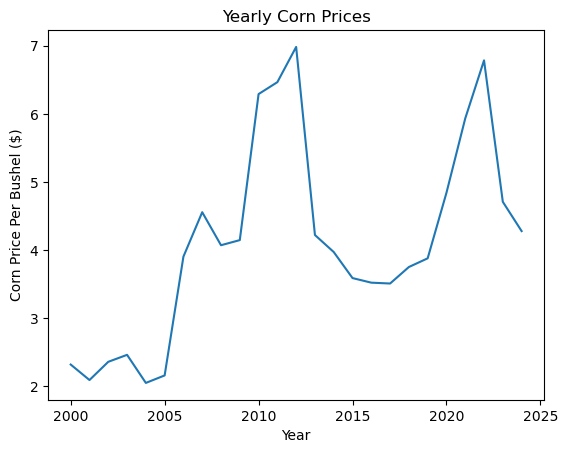

In [372]:
# Plot the yearly price data
yearly_price_data.set_index(["Year"]).plot(label="Corn Price Per Bushel ($)", legend=False)

# Add labels and title
plt.xlabel("Year")  # X-axis label
plt.ylabel("Corn Price Per Bushel ($)")  # Y-axis label

# Show the plot
plt.title("Yearly Corn Prices")  # Optional: Add a title for the plot
plt.show()

In [373]:
last_df = pd.merge(last_df, yearly_price_data, on  = "Year" , how = "left")
last_df.head()

,Country_x,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Country_y,Country,Element,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),Forest area (sq km),% Land available,Corn_Price_Per_Bushel
0,Afghanistan,2000,652230.0,AFG,96000.0,960.0,1.852782,0.147187,Afghanistan,Afghanistan,Area from CCI_LC,12281.1,241571.3,12084.4,0.370377,2.3175
1,Afghanistan,2001,652230.0,AFG,80000.0,800.0,1.852782,0.122656,Afghanistan,Afghanistan,Area from CCI_LC,11975.3,437131.2,12084.4,0.670210,2.0900
2,Afghanistan,2002,652230.0,AFG,100000.0,1000.0,1.852782,0.153320,Afghanistan,Afghanistan,Area from CCI_LC,11851.1,459501.7,12084.4,0.704509,2.3575
3,Afghanistan,2003,652230.0,AFG,250000.0,2500.0,1.852782,0.383300,Afghanistan,Afghanistan,Area from CCI_LC,11735.3,468533.6,12084.4,0.718356,2.4600
4,Afghanistan,2004,652230.0,AFG,250000.0,2500.0,1.852782,0.383300,Afghanistan,Afghanistan,Area from CCI_LC,11667.1,475878.3,12084.4,0.729617,2.0475


### Delta ºT

Source : https://www.fao.org/faostat/en/#data/ET

In [374]:
last_df.head()

,Country_x,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Country_y,Country,Element,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),Forest area (sq km),% Land available,Corn_Price_Per_Bushel
0,Afghanistan,2000,652230.0,AFG,96000.0,960.0,1.852782,0.147187,Afghanistan,Afghanistan,Area from CCI_LC,12281.1,241571.3,12084.4,0.370377,2.3175
1,Afghanistan,2001,652230.0,AFG,80000.0,800.0,1.852782,0.122656,Afghanistan,Afghanistan,Area from CCI_LC,11975.3,437131.2,12084.4,0.670210,2.0900
2,Afghanistan,2002,652230.0,AFG,100000.0,1000.0,1.852782,0.153320,Afghanistan,Afghanistan,Area from CCI_LC,11851.1,459501.7,12084.4,0.704509,2.3575
3,Afghanistan,2003,652230.0,AFG,250000.0,2500.0,1.852782,0.383300,Afghanistan,Afghanistan,Area from CCI_LC,11735.3,468533.6,12084.4,0.718356,2.4600
4,Afghanistan,2004,652230.0,AFG,250000.0,2500.0,1.852782,0.383300,Afghanistan,Afghanistan,Area from CCI_LC,11667.1,475878.3,12084.4,0.729617,2.0475


In [375]:
#Filtered
temp_change_df = pd.read_csv("./Data/New_temp_change.csv")

#Adding country codes
temp_change_df['iso3']=temp_change_df['Area Code (M49)'].apply(m49_to_iso3)
filtered_temp_df = temp_change_df[["Area","Year","iso3","Value"]][(temp_change_df["iso3"].isin(last_df["iso3"].unique()))]

country = "Costa Rica"
#Calculate the mean of the "Value" column
mean_value = filtered_temp_df[filtered_temp_df["Area"] == country]["Value"].mean()

# Fill missing values in the "Value" column where "Area" is "Costa Rica"
filtered_temp_df.loc[(filtered_temp_df["Area"] == country),"Value"] = mean_value

# No value in "Yemen"
filtered_temp_df.isna().sum()



Area      0
Year      0
iso3      0
Value    22
dtype: int64

In [376]:
#Dropping the na values
last_df = (pd.merge(last_df,filtered_temp_df,on = ["iso3","Year"])
           .rename(columns={"Value":"Temperature_Change"})
           .dropna()
           .reset_index(drop = True))

last_df.head()

,Country_x,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Country_y,Country,Element,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),Forest area (sq km),% Land available,Corn_Price_Per_Bushel,Area,Temperature_Change
0,Afghanistan,2000,652230.0,AFG,96000.0,960.0,1.852782,0.147187,Afghanistan,Afghanistan,Area from CCI_LC,12281.1,241571.3,12084.4,0.370377,2.3175,Afghanistan,1.064
1,Afghanistan,2001,652230.0,AFG,80000.0,800.0,1.852782,0.122656,Afghanistan,Afghanistan,Area from CCI_LC,11975.3,437131.2,12084.4,0.670210,2.0900,Afghanistan,1.377
2,Afghanistan,2002,652230.0,AFG,100000.0,1000.0,1.852782,0.153320,Afghanistan,Afghanistan,Area from CCI_LC,11851.1,459501.7,12084.4,0.704509,2.3575,Afghanistan,1.457
3,Afghanistan,2003,652230.0,AFG,250000.0,2500.0,1.852782,0.383300,Afghanistan,Afghanistan,Area from CCI_LC,11735.3,468533.6,12084.4,0.718356,2.4600,Afghanistan,0.710
4,Afghanistan,2004,652230.0,AFG,250000.0,2500.0,1.852782,0.383300,Afghanistan,Afghanistan,Area from CCI_LC,11667.1,475878.3,12084.4,0.729617,2.0475,Afghanistan,1.482


### Average ºT

Source: https://ourworldindata.org/grapher/monthly-average-surface-temperatures-by-year

In [377]:
avg_temp_df = pd.read_csv("./Data/monthly-average-surface-temperatures-by-year.csv")
avg_temp_df = avg_temp_df.drop(["Year"], axis = 1)
avg_temp_df = (avg_temp_df
               .groupby(by = ["Entity","Code"])
               .mean()
               .reset_index())
avg_temp_df = pd.melt(
    avg_temp_df,
    id_vars=["Entity", "Code"],  # Keep these columns fixed
    var_name="Reported_Year",    # Avoid using "Year" to prevent conflicts
    value_name="Temperature"     # Rename the values column
)

# Convert Reported_Year to integer
avg_temp_df["Reported_Year"] = avg_temp_df["Reported_Year"].astype(int)

# Apply the query with numeric comparison
avg_temp_df = (avg_temp_df
               .query("2000 <= Reported_Year <= 2021")
               .rename(columns = {"Temperature":"Average_Temperature",
                                  "Code":"iso3",
                                  "Reported_Year" : "Year"}))
avg_temp_df.head()

,Entity,iso3,Year,Average_Temperature
585,Afghanistan,AFG,2021,13.982914
586,Albania,ALB,2021,13.125356
587,Algeria,DZA,2021,25.220117
588,American Samoa,ASM,2021,26.756304
589,Andorra,AND,2021,5.152789


In [378]:
last_df = pd.merge(last_df,avg_temp_df,on = ["iso3","Year"],how = "left")
last_df.head()

,Country_x,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Country_y,Country,Element,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),Forest area (sq km),% Land available,Corn_Price_Per_Bushel,Area,Temperature_Change,Entity,Average_Temperature
0,Afghanistan,2000,652230.0,AFG,96000.0,960.0,1.852782,0.147187,Afghanistan,Afghanistan,Area from CCI_LC,12281.1,241571.3,12084.4,0.370377,2.3175,Afghanistan,1.064,Afghanistan,12.586175
1,Afghanistan,2001,652230.0,AFG,80000.0,800.0,1.852782,0.122656,Afghanistan,Afghanistan,Area from CCI_LC,11975.3,437131.2,12084.4,0.670210,2.0900,Afghanistan,1.377,Afghanistan,13.413867
2,Afghanistan,2002,652230.0,AFG,100000.0,1000.0,1.852782,0.153320,Afghanistan,Afghanistan,Area from CCI_LC,11851.1,459501.7,12084.4,0.704509,2.3575,Afghanistan,1.457,Afghanistan,13.051083
3,Afghanistan,2003,652230.0,AFG,250000.0,2500.0,1.852782,0.383300,Afghanistan,Afghanistan,Area from CCI_LC,11735.3,468533.6,12084.4,0.718356,2.4600,Afghanistan,0.710,Afghanistan,12.485457
4,Afghanistan,2004,652230.0,AFG,250000.0,2500.0,1.852782,0.383300,Afghanistan,Afghanistan,Area from CCI_LC,11667.1,475878.3,12084.4,0.729617,2.0475,Afghanistan,1.482,Afghanistan,13.233360


### Rainfall dataset

Source: https://data.worldbank.org/indicator/AG.LND.PRCP.MM?utm_source=chatgpt.com

**Content of data**:

 - Average precipitation in depth (mm per year)
 - Average precipitation is the long-term average in depth (over space and time) of annual precipitation in the country. Precipitation is defined as any kind of water that falls from clouds as a liquid or a solid.



In [379]:
#Just to check the situation with last_df
last_df.head()

,Country_x,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Country_y,Country,Element,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),Forest area (sq km),% Land available,Corn_Price_Per_Bushel,Area,Temperature_Change,Entity,Average_Temperature
0,Afghanistan,2000,652230.0,AFG,96000.0,960.0,1.852782,0.147187,Afghanistan,Afghanistan,Area from CCI_LC,12281.1,241571.3,12084.4,0.370377,2.3175,Afghanistan,1.064,Afghanistan,12.586175
1,Afghanistan,2001,652230.0,AFG,80000.0,800.0,1.852782,0.122656,Afghanistan,Afghanistan,Area from CCI_LC,11975.3,437131.2,12084.4,0.670210,2.0900,Afghanistan,1.377,Afghanistan,13.413867
2,Afghanistan,2002,652230.0,AFG,100000.0,1000.0,1.852782,0.153320,Afghanistan,Afghanistan,Area from CCI_LC,11851.1,459501.7,12084.4,0.704509,2.3575,Afghanistan,1.457,Afghanistan,13.051083
3,Afghanistan,2003,652230.0,AFG,250000.0,2500.0,1.852782,0.383300,Afghanistan,Afghanistan,Area from CCI_LC,11735.3,468533.6,12084.4,0.718356,2.4600,Afghanistan,0.710,Afghanistan,12.485457
4,Afghanistan,2004,652230.0,AFG,250000.0,2500.0,1.852782,0.383300,Afghanistan,Afghanistan,Area from CCI_LC,11667.1,475878.3,12084.4,0.729617,2.0475,Afghanistan,1.482,Afghanistan,13.233360


In [380]:
rainfall_df = pd.read_excel("./Data/rainfall_data.xls")
rainfall_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,NaN,327.0,327.0,327.0,327.0,327.0,...,327.0,327.0,327.0,327.0,327.0,327.0,327.0,327.0,NaN,NaN
3,Africa Western and Central,AFW,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,NaN,1010.0,1010.0,1010.0,1010.0,1010.0,...,1010.0,1010.0,1010.0,1010.0,1010.0,1010.0,1010.0,1010.0,NaN,NaN


In [381]:
rainfall_df_new = rainfall_df.drop(["Country Name","Indicator Name","Indicator Code"], axis =1)

adj_rainfall_df = (pd.melt(rainfall_df_new,
    id_vars=["Country Code"],  # Keep these columns fixed
    var_name="Year",    # Avoid using "Year" to prevent conflicts
    value_name="Rain(mm per year)" )
    .sort_values(["Country Code","Year"])
    .reset_index(drop = True)
    .rename(columns = {"Country Code" : "iso3"}))

adj_rainfall_df["Year"] = adj_rainfall_df["Year"].astype('int64') 

adj_rainfall_df.head()

,iso3,Year,Rain(mm per year)
0,ABW,1960,NaN
1,ABW,1961,NaN
2,ABW,1962,NaN
3,ABW,1963,NaN
4,ABW,1964,NaN


In [382]:
last_df = pd.merge(last_df,adj_rainfall_df,on = ["iso3","Year"],how = "left")
last_df.head()


,Country_x,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Country_y,Country,...,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),Forest area (sq km),% Land available,Corn_Price_Per_Bushel,Area,Temperature_Change,Entity,Average_Temperature,Rain(mm per year)
0,Afghanistan,2000,652230.0,AFG,96000.0,960.0,1.852782,0.147187,Afghanistan,Afghanistan,...,12281.1,241571.3,12084.4,0.370377,2.3175,Afghanistan,1.064,Afghanistan,12.586175,327.0
1,Afghanistan,2001,652230.0,AFG,80000.0,800.0,1.852782,0.122656,Afghanistan,Afghanistan,...,11975.3,437131.2,12084.4,0.670210,2.0900,Afghanistan,1.377,Afghanistan,13.413867,327.0
2,Afghanistan,2002,652230.0,AFG,100000.0,1000.0,1.852782,0.153320,Afghanistan,Afghanistan,...,11851.1,459501.7,12084.4,0.704509,2.3575,Afghanistan,1.457,Afghanistan,13.051083,327.0
3,Afghanistan,2003,652230.0,AFG,250000.0,2500.0,1.852782,0.383300,Afghanistan,Afghanistan,...,11735.3,468533.6,12084.4,0.718356,2.4600,Afghanistan,0.710,Afghanistan,12.485457,327.0
4,Afghanistan,2004,652230.0,AFG,250000.0,2500.0,1.852782,0.383300,Afghanistan,Afghanistan,...,11667.1,475878.3,12084.4,0.729617,2.0475,Afghanistan,1.482,Afghanistan,13.233360,327.0


### Altitude Data

In [383]:
elevation_df = pd.read_csv("./Data/elevation_data.csv")

# Initialize the CountryConverter
cc = coco.CountryConverter()

# Convert 'Country' column to ISO alpha-3 codes
elevation_df['iso3'] = elevation_df['country'].apply(lambda x: cc.convert(names=x, to='ISO3'))

# Display the updated DataFrame
elevation_df = elevation_df.filter(["country","iso3","ElevationAverageElevationMeters"])
elevation_df.head()

,country,iso3,ElevationAverageElevationMeters
0,India,IND,621.0
1,China,CHN,1840.0
2,Indonesia,IDN,367.0
3,Pakistan,PAK,900.0
4,Nigeria,NGA,380.0


In [384]:
last_df = pd.merge(last_df, elevation_df, on = "iso3", how = "inner")
last_df.head()

,Country_x,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Country_y,Country,...,Forest area (sq km),% Land available,Corn_Price_Per_Bushel,Area,Temperature_Change,Entity,Average_Temperature,Rain(mm per year),country,ElevationAverageElevationMeters
0,Afghanistan,2000,652230.0,AFG,96000.0,960.0,1.852782,0.147187,Afghanistan,Afghanistan,...,12084.4,0.370377,2.3175,Afghanistan,1.064,Afghanistan,12.586175,327.0,Afghanistan,1884.0
1,Afghanistan,2001,652230.0,AFG,80000.0,800.0,1.852782,0.122656,Afghanistan,Afghanistan,...,12084.4,0.670210,2.0900,Afghanistan,1.377,Afghanistan,13.413867,327.0,Afghanistan,1884.0
2,Afghanistan,2002,652230.0,AFG,100000.0,1000.0,1.852782,0.153320,Afghanistan,Afghanistan,...,12084.4,0.704509,2.3575,Afghanistan,1.457,Afghanistan,13.051083,327.0,Afghanistan,1884.0
3,Afghanistan,2003,652230.0,AFG,250000.0,2500.0,1.852782,0.383300,Afghanistan,Afghanistan,...,12084.4,0.718356,2.4600,Afghanistan,0.710,Afghanistan,12.485457,327.0,Afghanistan,1884.0
4,Afghanistan,2004,652230.0,AFG,250000.0,2500.0,1.852782,0.383300,Afghanistan,Afghanistan,...,12084.4,0.729617,2.0475,Afghanistan,1.482,Afghanistan,13.233360,327.0,Afghanistan,1884.0


### Map of the elevation (if we are going to use)

## EDA

In [385]:
df_avg_forest = pd.DataFrame(last_df.groupby("Country")["Forest area (sq km)"].mean()).reset_index()
df_avg_forest['iso3'] = df_avg_forest['Country'].apply(get_iso3)
df_avg_forest

,Country,Forest area (sq km),iso3
0,Afghanistan,12084.400000,AFG
1,Albania,7817.236364,ALB
2,Algeria,18460.378773,DZA
3,Angola,718804.662864,AGO
4,Argentina,304496.666682,ARG
...,...,...,...
77,Ukraine,95895.000000,UKR
78,Uruguay,17396.022727,URY
79,Uzbekistan,33619.832500,UZB
80,Viet Nam,133919.186364,VNM


In [386]:
# Now plot the map with Plotly Express
fig = px.choropleth(df_avg_forest, 
                    locations='iso3',  # ISO-3 country codes
                    locationmode='ISO-3',
                    color='Forest area (sq km)',  
                    hover_name='Country',
                    title = 'Forest Area (sq km) per Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

In [387]:
df_avg_corn = pd.DataFrame(last_df.groupby("Country")["Total Size Cornfield in sq km"].mean()).reset_index()
df_avg_corn['iso3'] = df_avg_corn['Country'].apply(get_iso3)
df_avg_corn

,Country,Total Size Cornfield in sq km,iso3
0,Afghanistan,1474.690455,AFG
1,Albania,528.710909,ALB
2,Algeria,7.200000,DZA
3,Angola,15592.615000,AGO
4,Argentina,42555.029091,ARG
...,...,...,...
77,Ukraine,32249.500000,UKR
78,Uruguay,814.931818,URY
79,Uzbekistan,378.259545,UZB
80,Viet Nam,10417.120455,VNM


In [388]:
# Now plot the map with Plotly Express
fig = px.choropleth(last_df, 
                    locations='iso3',  # ISO-3 country codes
                    locationmode='ISO-3',
                    color='Total Size Cornfield in sq km',  # deforestation rates
                    hover_name='Country',
                    title = 'Corn Fields in sq km per Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

In [389]:
df_avg_rain = pd.DataFrame(last_df.groupby("Country")["Rain(mm per year)"].mean()).reset_index()
df_avg_rain['iso3'] = df_avg_rain['Country'].apply(get_iso3)
df_avg_rain

# Now plot the map with Plotly Express
fig = px.choropleth(df_avg_rain, 
                    locations='iso3',  # ISO-3 country codes
                    locationmode='ISO-3',
                    color='Rain(mm per year)',  
                    hover_name='Country',
                    title = 'Rain(mm per year) per Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

c:\Users\Mert\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



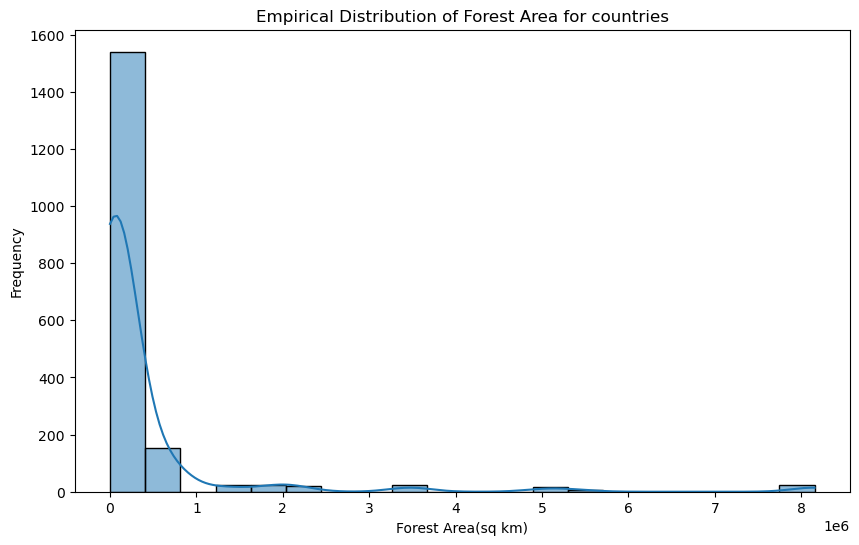

In [390]:
plt.figure(figsize=(10,6))
sns.histplot(last_df['Forest area (sq km)'], bins=20, kde=True, edgecolor='black')

# Add labels and title
plt.xlabel('Forest Area(sq km)')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Forest Area for countries')

# Show the plot
plt.show()

In [391]:
last_df['Forest area (sq km)'].skew()

5.09266303212788

c:\Users\Mert\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



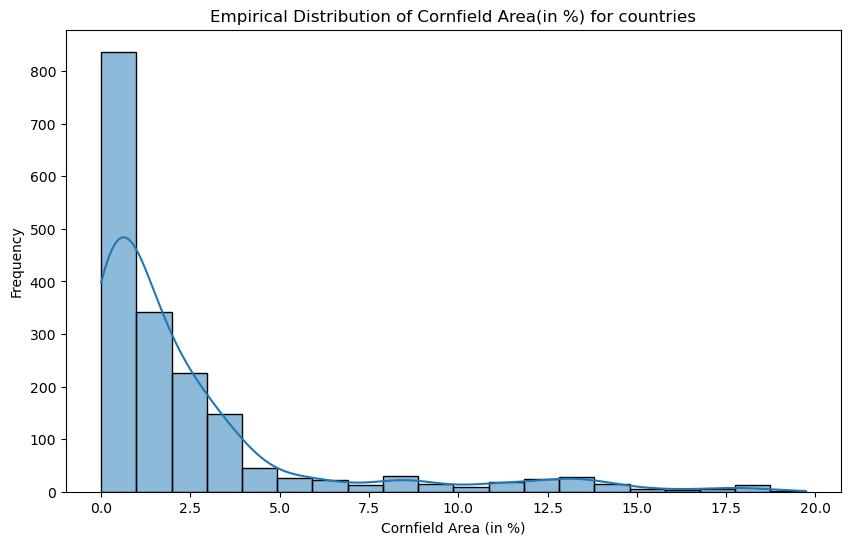

In [392]:
#A modifier
plt.figure(figsize=(10,6))
sns.histplot(last_df['% of Cornfield Area'], bins=20, kde=True, edgecolor='black')

# Add labels and title
plt.xlabel('Cornfield Area (in %)')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Cornfield Area(in %) for countries')

# Show the plot
plt.show()

In [393]:
#A modifier
last_df['% of Cornfield Area'].skew()

2.4430764154917757

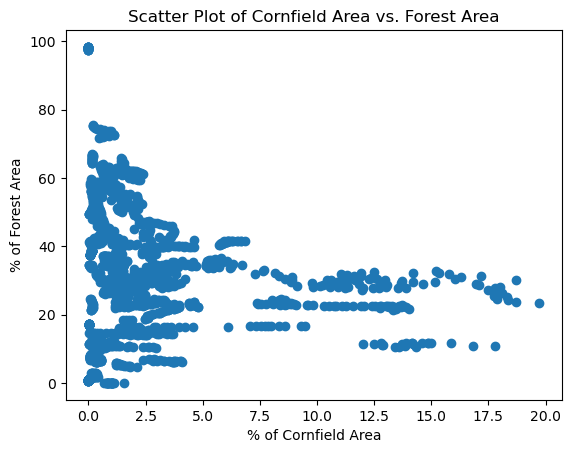

In [394]:
#A modifier
# Create a scatter plot
plt.scatter(last_df['% of Cornfield Area'], last_df['% of Forest Area'])

# Set the labels for the axes
plt.xlabel('% of Cornfield Area')
plt.ylabel('% of Forest Area')

# Set the title of the plot
plt.title('Scatter Plot of Cornfield Area vs. Forest Area')

# Calculate the linear regression
x = last_df['% of Cornfield Area']
y = last_df['% of Forest Area']

# Show the plot
plt.show()

c:\Users\Mert\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



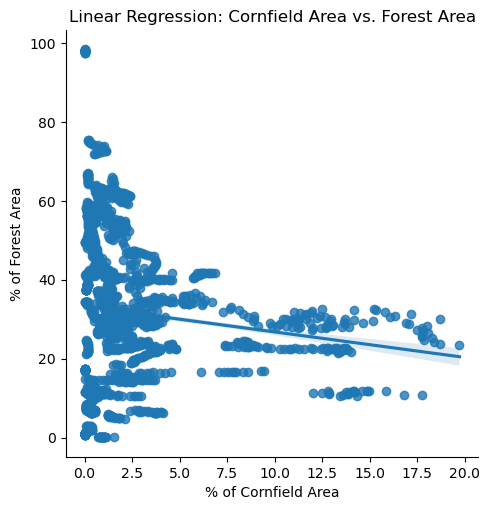

In [395]:
#A modifier aussi
# Create a scatter plot with a linear regression line
sns.lmplot(x='% of Cornfield Area', y='% of Forest Area', data=last_df)

# Set the title of the plot
plt.title('Linear Regression: Cornfield Area vs. Forest Area')

# Show the plot
plt.show()

# Inclusion of the dummy for the heterogeneity variable in sq km

In [396]:
last_df

,Country_x,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Country_y,Country,...,Forest area (sq km),% Land available,Corn_Price_Per_Bushel,Area,Temperature_Change,Entity,Average_Temperature,Rain(mm per year),country,ElevationAverageElevationMeters
0,Afghanistan,2000,652230.0,AFG,96000.0,960.00,1.852782,0.147187,Afghanistan,Afghanistan,...,12084.400,0.370377,2.3175,Afghanistan,1.064,Afghanistan,12.586175,327.0,Afghanistan,1884.0
1,Afghanistan,2001,652230.0,AFG,80000.0,800.00,1.852782,0.122656,Afghanistan,Afghanistan,...,12084.400,0.670210,2.0900,Afghanistan,1.377,Afghanistan,13.413867,327.0,Afghanistan,1884.0
2,Afghanistan,2002,652230.0,AFG,100000.0,1000.00,1.852782,0.153320,Afghanistan,Afghanistan,...,12084.400,0.704509,2.3575,Afghanistan,1.457,Afghanistan,13.051083,327.0,Afghanistan,1884.0
3,Afghanistan,2003,652230.0,AFG,250000.0,2500.00,1.852782,0.383300,Afghanistan,Afghanistan,...,12084.400,0.718356,2.4600,Afghanistan,0.710,Afghanistan,12.485457,327.0,Afghanistan,1884.0
4,Afghanistan,2004,652230.0,AFG,250000.0,2500.00,1.852782,0.383300,Afghanistan,Afghanistan,...,12084.400,0.729617,2.0475,Afghanistan,1.482,Afghanistan,13.233360,327.0,Afghanistan,1884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,Zambia,2017,743390.0,ZMB,1433944.0,14339.44,61.042885,1.928926,Zambia,Zambia,...,453786.700,0.394647,3.5075,Zambia,0.579,Zambia,21.990675,1020.0,Zambia,1138.0
1822,Zambia,2018,743390.0,ZMB,1086006.0,10860.06,60.789707,1.460883,Zambia,Zambia,...,451904.600,0.393014,3.7500,Zambia,0.998,Zambia,22.302766,1020.0,Zambia,1138.0
1823,Zambia,2019,743390.0,ZMB,841693.0,8416.93,60.536515,1.132236,Zambia,Zambia,...,450022.400,0.405972,3.8775,Zambia,1.349,Zambia,22.617600,1020.0,Zambia,1138.0
1824,Zambia,2020,743390.0,ZMB,1333519.0,13335.19,60.283337,1.793835,Zambia,Zambia,...,448140.300,0.507708,4.8400,Zambia,1.386,Zambia,22.167939,1020.0,Zambia,1138.0


In [397]:
#Dummy for the heterogeneity variable
# Finding the median of Land_Size
initial_hetero_var = last_df['Total Size Land suitable for corn expansion (sq km)'][last_df['Year']==last_df['Year'].min()]
median_suitable_land = initial_hetero_var.median()
median_suitable_land
# Creating a dummy variable for whether the land size is higher than the median
last_df['Suitable_Land_Higher_Than_Median'] = last_df['Total Size Land suitable for corn expansion (sq km)'].apply(lambda val: 1 if (val>median_suitable_land) else 0)
last_df


,Country_x,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Country_y,Country,...,% Land available,Corn_Price_Per_Bushel,Area,Temperature_Change,Entity,Average_Temperature,Rain(mm per year),country,ElevationAverageElevationMeters,Suitable_Land_Higher_Than_Median
0,Afghanistan,2000,652230.0,AFG,96000.0,960.00,1.852782,0.147187,Afghanistan,Afghanistan,...,0.370377,2.3175,Afghanistan,1.064,Afghanistan,12.586175,327.0,Afghanistan,1884.0,1
1,Afghanistan,2001,652230.0,AFG,80000.0,800.00,1.852782,0.122656,Afghanistan,Afghanistan,...,0.670210,2.0900,Afghanistan,1.377,Afghanistan,13.413867,327.0,Afghanistan,1884.0,1
2,Afghanistan,2002,652230.0,AFG,100000.0,1000.00,1.852782,0.153320,Afghanistan,Afghanistan,...,0.704509,2.3575,Afghanistan,1.457,Afghanistan,13.051083,327.0,Afghanistan,1884.0,1
3,Afghanistan,2003,652230.0,AFG,250000.0,2500.00,1.852782,0.383300,Afghanistan,Afghanistan,...,0.718356,2.4600,Afghanistan,0.710,Afghanistan,12.485457,327.0,Afghanistan,1884.0,1
4,Afghanistan,2004,652230.0,AFG,250000.0,2500.00,1.852782,0.383300,Afghanistan,Afghanistan,...,0.729617,2.0475,Afghanistan,1.482,Afghanistan,13.233360,327.0,Afghanistan,1884.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,Zambia,2017,743390.0,ZMB,1433944.0,14339.44,61.042885,1.928926,Zambia,Zambia,...,0.394647,3.5075,Zambia,0.579,Zambia,21.990675,1020.0,Zambia,1138.0,1
1822,Zambia,2018,743390.0,ZMB,1086006.0,10860.06,60.789707,1.460883,Zambia,Zambia,...,0.393014,3.7500,Zambia,0.998,Zambia,22.302766,1020.0,Zambia,1138.0,1
1823,Zambia,2019,743390.0,ZMB,841693.0,8416.93,60.536515,1.132236,Zambia,Zambia,...,0.405972,3.8775,Zambia,1.349,Zambia,22.617600,1020.0,Zambia,1138.0,1
1824,Zambia,2020,743390.0,ZMB,1333519.0,13335.19,60.283337,1.793835,Zambia,Zambia,...,0.507708,4.8400,Zambia,1.386,Zambia,22.167939,1020.0,Zambia,1138.0,1


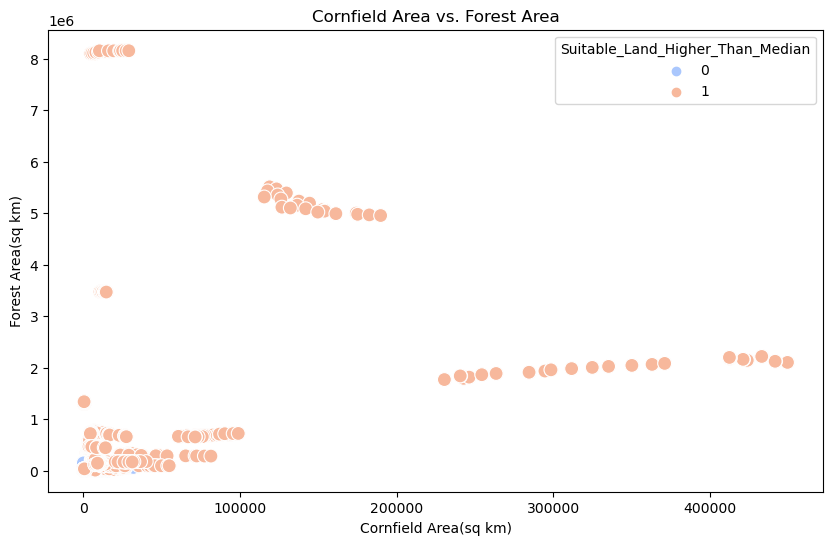

In [398]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=last_df, 
                x='Total Size Cornfield in sq km', 
                y='Forest area (sq km)', 
                hue='Suitable_Land_Higher_Than_Median', 
                palette='coolwarm', 
                s=100)

# Adding labels and title
plt.title('Cornfield Area vs. Forest Area')
plt.xlabel('Cornfield Area(sq km)')
plt.ylabel('Forest Area(sq km)')

# Display the plot
plt.show()

c:\Users\Mert\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x600 with 0 Axes>

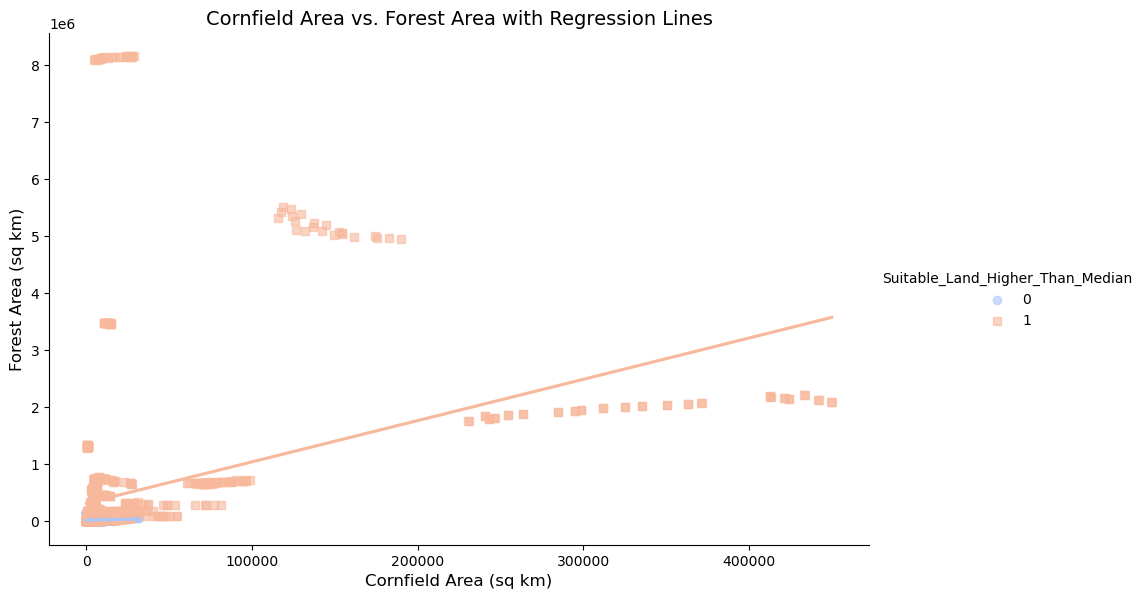

In [399]:
plt.figure(figsize=(10, 6))

# Create a scatterplot with regression lines
sns.lmplot(
    data=last_df,
    x='Total Size Cornfield in sq km', 
    y='Forest area (sq km)', 
    hue='Suitable_Land_Higher_Than_Median',
    palette='coolwarm',
    markers=['o', 's'],  # Different markers for each group
    ci=None,  # Remove confidence intervals for clarity (optional)
    height=6,  # Height of the plot
    aspect=1.5,  # Aspect ratio
    scatter_kws={'alpha': 0.6} #transparency
)

# Add labels and title
plt.title('Cornfield Area vs. Forest Area with Regression Lines', fontsize=14)
plt.xlabel('Cornfield Area (sq km)', fontsize=12)
plt.ylabel('Forest Area (sq km)', fontsize=12)

# Show the plot
plt.show()

c:\Users\Mert\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



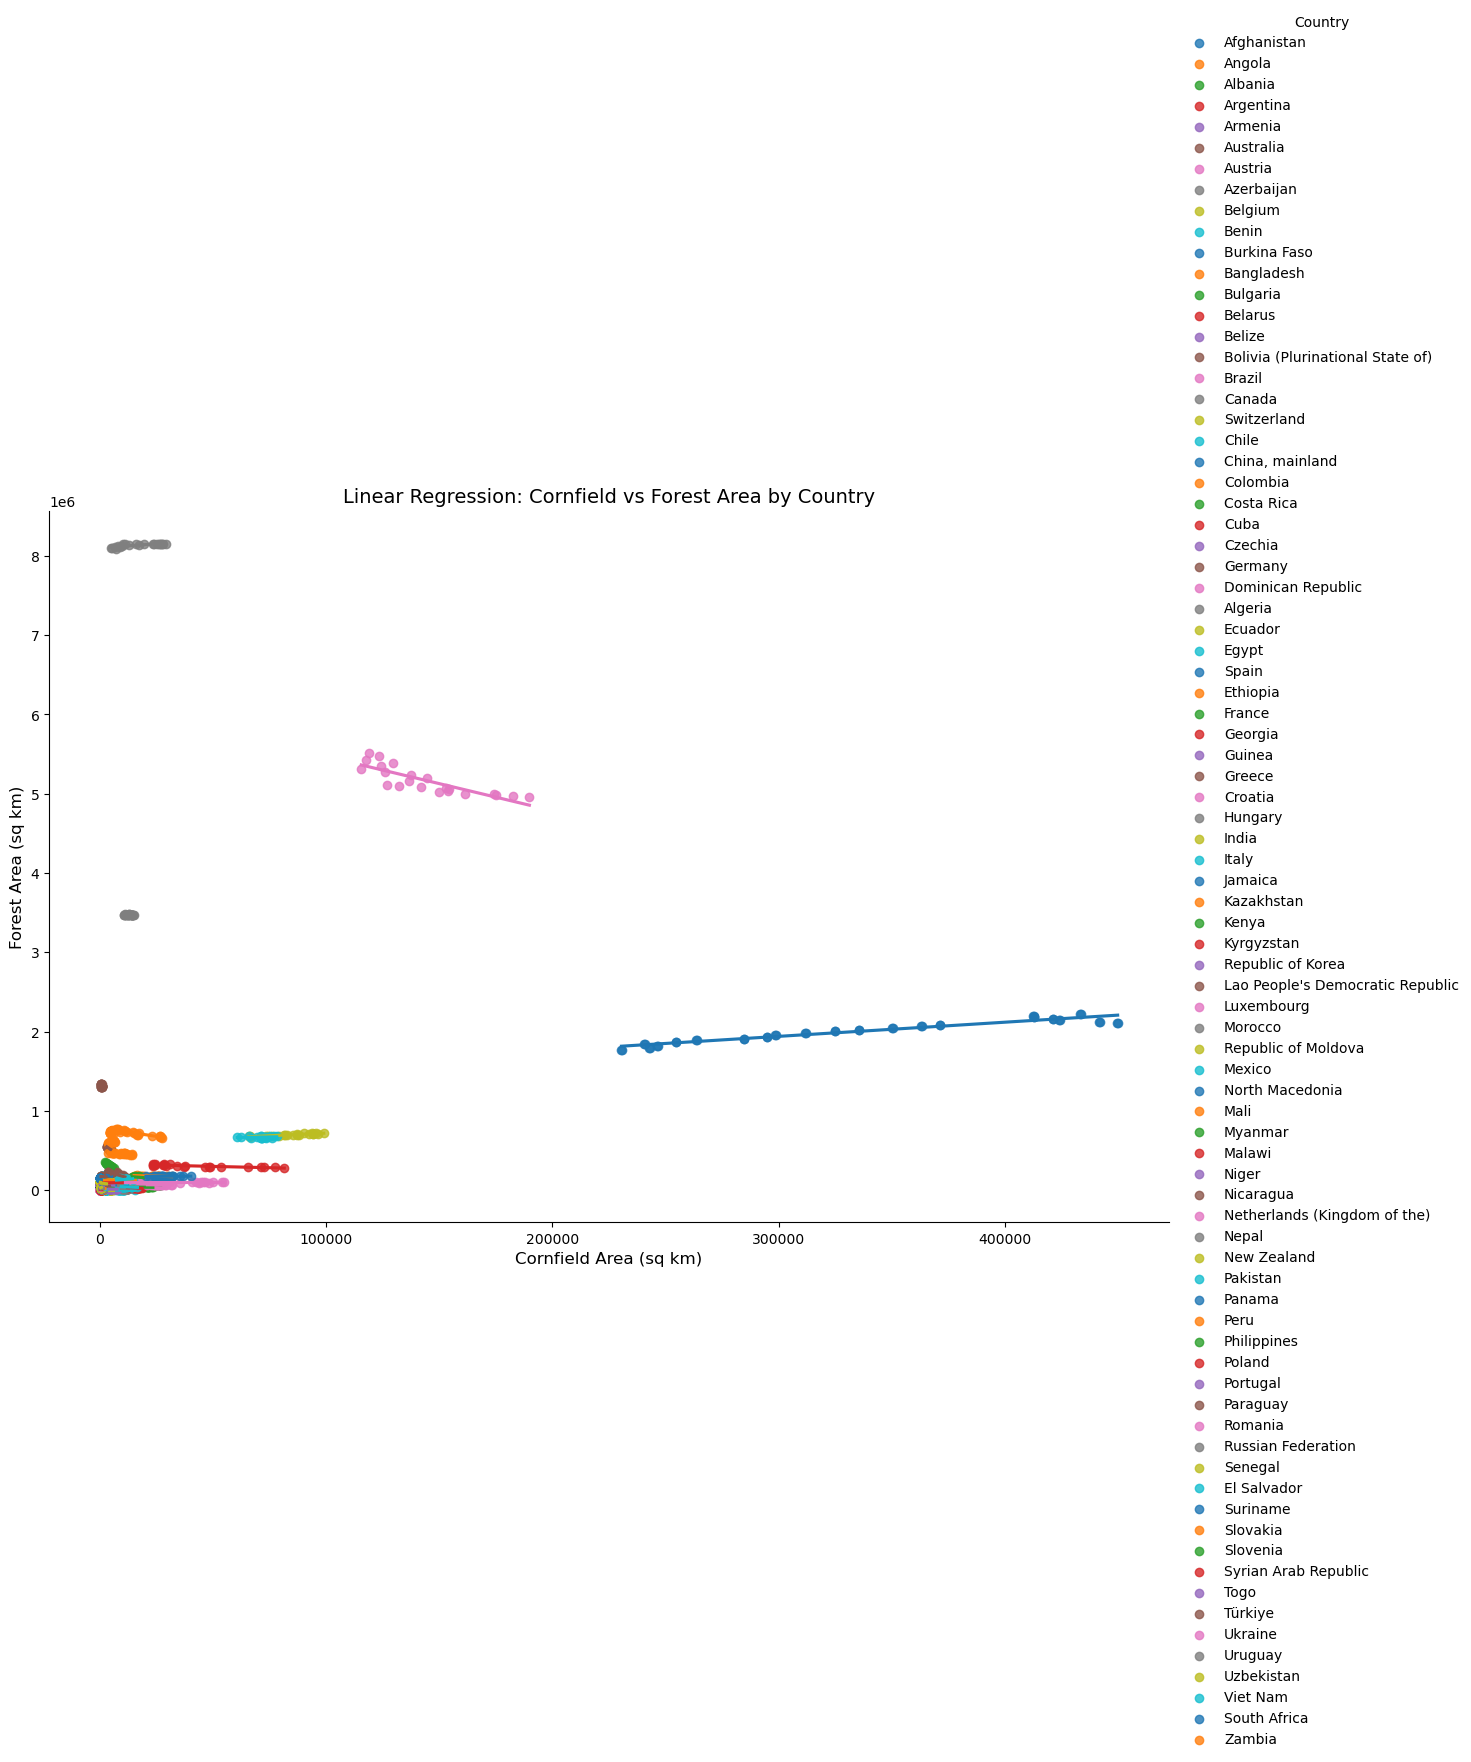

In [400]:
# Multiple linear regression lines, one for each country
sns.lmplot(
    data=last_df,
    x='Total Size Cornfield in sq km', 
    y='Forest area (sq km)', 
    hue='Country',  # Different colors for each country
    palette='tab10',  # Choose a palette
    ci=None,  # Remove confidence intervals for clarity
    height=8,  # Figure height
    aspect=1.5  # Aspect ratio
)

# Add labels and title
plt.title('Linear Regression: Cornfield vs Forest Area by Country', fontsize=14)
plt.xlabel('Cornfield Area (sq km)', fontsize=12)
plt.ylabel('Forest Area (sq km)', fontsize=12)

# Show the plot
plt.show()

c:\Users\Mert\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



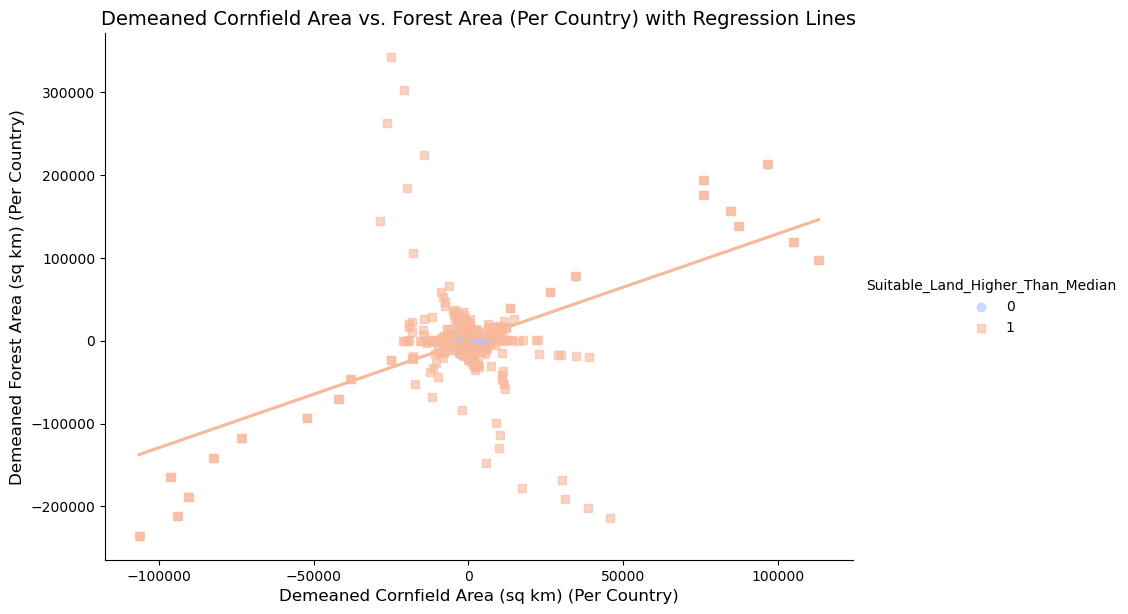

In [401]:
# Demean Cornfield Area` and  Forest Area` within each country
last_df['Demeaned_Cornfield_Area'] = last_df.groupby('Country')['Total Size Cornfield in sq km'].transform(lambda x: x - x.mean())
last_df['Demeaned_Forest_Area'] = last_df.groupby('Country')['Forest area (sq km)'].transform(lambda x: x - x.mean())

# Plot the demeaned data
sns.lmplot(
    data=last_df,
    x='Demeaned_Cornfield_Area',  # Demeaned Cornfield Area per country
    y='Demeaned_Forest_Area',  # Demeaned Forest Area per country
    hue='Suitable_Land_Higher_Than_Median',  # Group by suitability
    palette='coolwarm',
    markers=['o', 's'],  # Different markers for each group
    ci=None,  # Remove confidence intervals for clarity (optional)
    height=6,  # Height of the plot
    aspect=1.5,  # Aspect ratio
    scatter_kws={'alpha': 0.6} #transparency
)

# Add labels and title
plt.title('Demeaned Cornfield Area vs. Forest Area (Per Country) with Regression Lines', fontsize=14)
plt.xlabel('Demeaned Cornfield Area (sq km) (Per Country)', fontsize=12)
plt.ylabel('Demeaned Forest Area (sq km) (Per Country)', fontsize=12)

# Show the plot
plt.show()

c:\Users\Mert\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



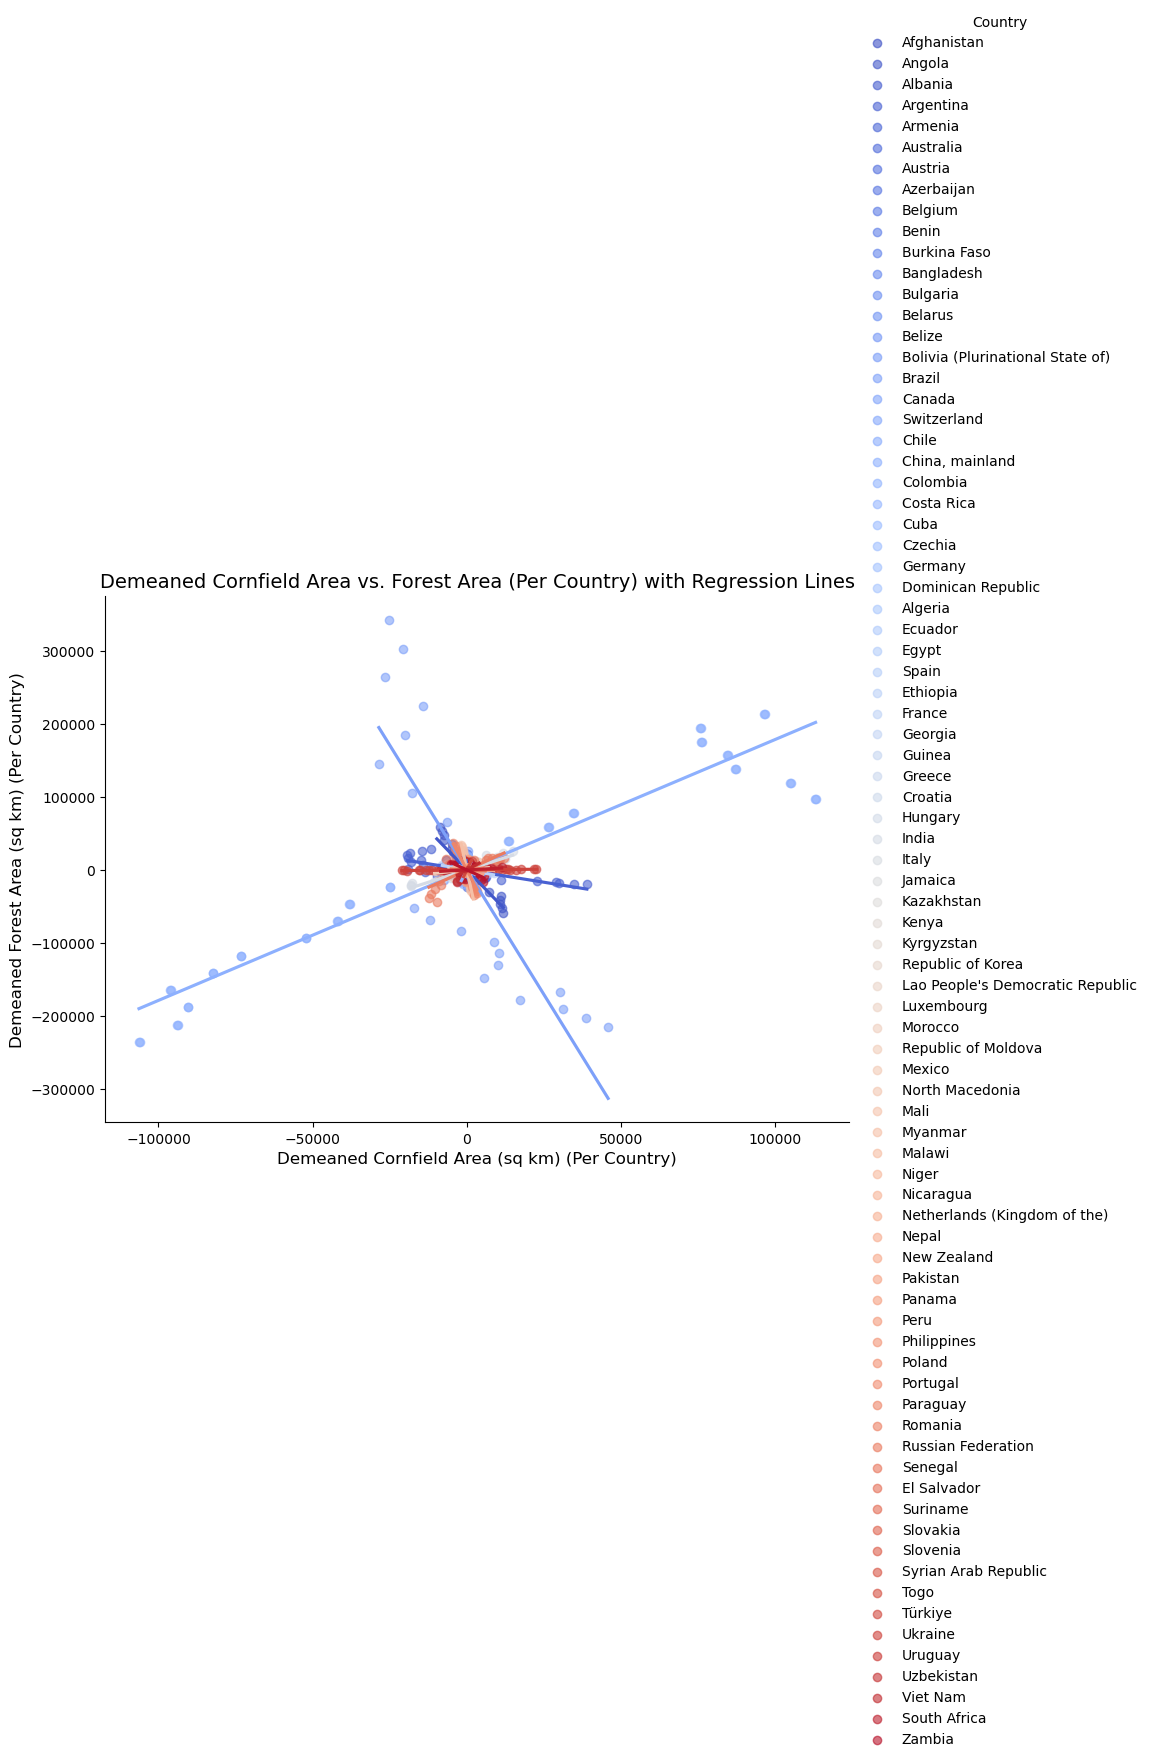

In [402]:

# Plot the demeaned data
sns.lmplot(
    data=last_df,
    x='Demeaned_Cornfield_Area',  # Demeaned Cornfield Area per country
    y='Demeaned_Forest_Area',  # Demeaned Forest Area per country
    hue='Country',  # Group by suitability
    palette='coolwarm',
    ci=None,  # Remove confidence intervals for clarity (optional)
    height=6,  # Height of the plot
    aspect=1.5,  # Aspect ratio
    scatter_kws={'alpha': 0.6} #transparency
)

# Add labels and title
plt.title('Demeaned Cornfield Area vs. Forest Area (Per Country) with Regression Lines', fontsize=14)
plt.xlabel('Demeaned Cornfield Area (sq km) (Per Country)', fontsize=12)
plt.ylabel('Demeaned Forest Area (sq km) (Per Country)', fontsize=12)

# Show the plot
plt.show()

In [403]:
# correlation between cornfield area and forest area for group 0, 
#so for countries with suitable land available for corn expansion lower than the median:
group0 = last_df[last_df['Suitable_Land_Higher_Than_Median']==0]
correlation0 = group0['Total Size Cornfield in sq km'].corr(group0['Forest area (sq km)'])

# correlation between cornfield area and forest area for group 1, 
#so for countries with suitable land available for corn expansion higher than the median:
group1 = last_df[last_df['Suitable_Land_Higher_Than_Median']==1]
correlation1 = group1['Total Size Cornfield in sq km'].corr(group1['Forest area (sq km)'])

print(f"Correlation for Group 0: {correlation0}")
print(f"Correlation for Group 1: {correlation1}")

Correlation for Group 0: 0.07718799888074383
Correlation for Group 1: 0.354925421875052


In [404]:
# correlation between cornfield area and forest area for group 0, 
#so for countries with suitable land available for corn expansion lower than the median:
group0 = last_df[last_df['Suitable_Land_Higher_Than_Median']==0]
correlation0 = group0['Demeaned_Cornfield_Area'].corr(group0['Demeaned_Forest_Area'])

# correlation between cornfield area and forest area for group 1, 
#so for countries with suitable land available for corn expansion higher than the median:
group1 = last_df[last_df['Suitable_Land_Higher_Than_Median']==1]
correlation1 = group1['Demeaned_Cornfield_Area'].corr(group1['Demeaned_Forest_Area'])

print(f"Correlation for Group 0: {correlation0}")
print(f"Correlation for Group 1: {correlation1}")

Correlation for Group 0: -0.11568388445767283
Correlation for Group 1: 0.5340325433343155


# Inclusion of the dummy for the heterogeneity variable, all in %

In [405]:
#Dummy for the heterogeneity variable
# Finding the median of Land_Size
initial_hetero_var_pct = last_df['% Land available'][last_df['Year']==last_df['Year'].min()]
median_suitable_land_pct = initial_hetero_var_pct.median()
median_suitable_land_pct
# Creating a dummy variable for whether the land size is higher than the median
last_df['Suitable_Land_Higher_Than_Median_pct'] = last_df['% Land available'].apply(lambda val: 1 if (val>median_suitable_land_pct) else 0)
last_df

,Country_x,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Country_y,Country,...,Temperature_Change,Entity,Average_Temperature,Rain(mm per year),country,ElevationAverageElevationMeters,Suitable_Land_Higher_Than_Median,Demeaned_Cornfield_Area,Demeaned_Forest_Area,Suitable_Land_Higher_Than_Median_pct
0,Afghanistan,2000,652230.0,AFG,96000.0,960.00,1.852782,0.147187,Afghanistan,Afghanistan,...,1.064,Afghanistan,12.586175,327.0,Afghanistan,1884.0,1,-514.690455,1.818989e-12,1
1,Afghanistan,2001,652230.0,AFG,80000.0,800.00,1.852782,0.122656,Afghanistan,Afghanistan,...,1.377,Afghanistan,13.413867,327.0,Afghanistan,1884.0,1,-674.690455,1.818989e-12,1
2,Afghanistan,2002,652230.0,AFG,100000.0,1000.00,1.852782,0.153320,Afghanistan,Afghanistan,...,1.457,Afghanistan,13.051083,327.0,Afghanistan,1884.0,1,-474.690455,1.818989e-12,1
3,Afghanistan,2003,652230.0,AFG,250000.0,2500.00,1.852782,0.383300,Afghanistan,Afghanistan,...,0.710,Afghanistan,12.485457,327.0,Afghanistan,1884.0,1,1025.309545,1.818989e-12,1
4,Afghanistan,2004,652230.0,AFG,250000.0,2500.00,1.852782,0.383300,Afghanistan,Afghanistan,...,1.482,Afghanistan,13.233360,327.0,Afghanistan,1884.0,1,1025.309545,1.818989e-12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,Zambia,2017,743390.0,ZMB,1433944.0,14339.44,61.042885,1.928926,Zambia,Zambia,...,0.579,Zambia,21.990675,1020.0,Zambia,1138.0,1,5456.480000,-8.422533e+03,1
1822,Zambia,2018,743390.0,ZMB,1086006.0,10860.06,60.789707,1.460883,Zambia,Zambia,...,0.998,Zambia,22.302766,1020.0,Zambia,1138.0,1,1977.100000,-1.030463e+04,1
1823,Zambia,2019,743390.0,ZMB,841693.0,8416.93,60.536515,1.132236,Zambia,Zambia,...,1.349,Zambia,22.617600,1020.0,Zambia,1138.0,1,-466.030000,-1.218683e+04,1
1824,Zambia,2020,743390.0,ZMB,1333519.0,13335.19,60.283337,1.793835,Zambia,Zambia,...,1.386,Zambia,22.167939,1020.0,Zambia,1138.0,1,4452.230000,-1.406893e+04,1


c:\Users\Mert\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



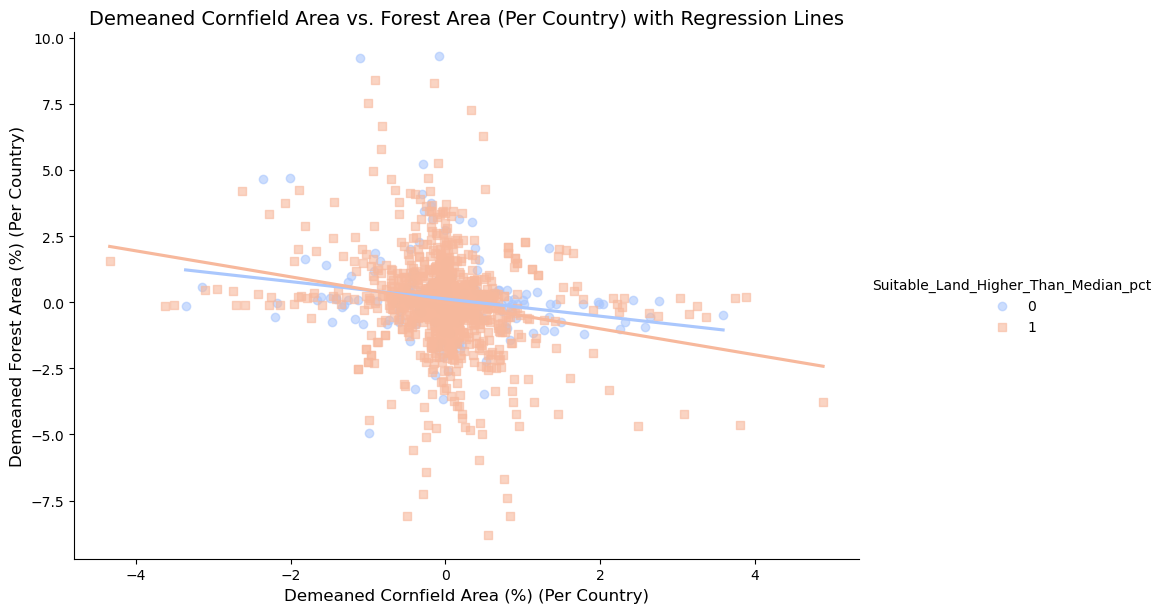

In [406]:
# Demean Cornfield Area` and  Forest Area` within each country
last_df['Demeaned_Cornfield_Area_pct'] = last_df.groupby('Country')['% of Cornfield Area'].transform(lambda x: x - x.mean())
last_df['Demeaned_Forest_Area_pct'] = last_df.groupby('Country')['% of Forest Area'].transform(lambda x: x - x.mean())

# Plot the demeaned data
sns.lmplot(
    data=last_df,
    x='Demeaned_Cornfield_Area_pct',  # Demeaned Cornfield Area per country
    y='Demeaned_Forest_Area_pct',  # Demeaned Forest Area per country
    hue='Suitable_Land_Higher_Than_Median_pct',  # Group by suitability
    palette='coolwarm',
    markers=['o', 's'],  # Different markers for each group
    ci=None,  # Remove confidence intervals for clarity (optional)
    height=6,  # Height of the plot
    aspect=1.5,  # Aspect ratio
    scatter_kws={'alpha': 0.6} #transparency
)

# Add labels and title
plt.title('Demeaned Cornfield Area vs. Forest Area (Per Country) with Regression Lines', fontsize=14)
plt.xlabel('Demeaned Cornfield Area (%) (Per Country)', fontsize=12)
plt.ylabel('Demeaned Forest Area (%) (Per Country)', fontsize=12)

# Show the plot
plt.show()

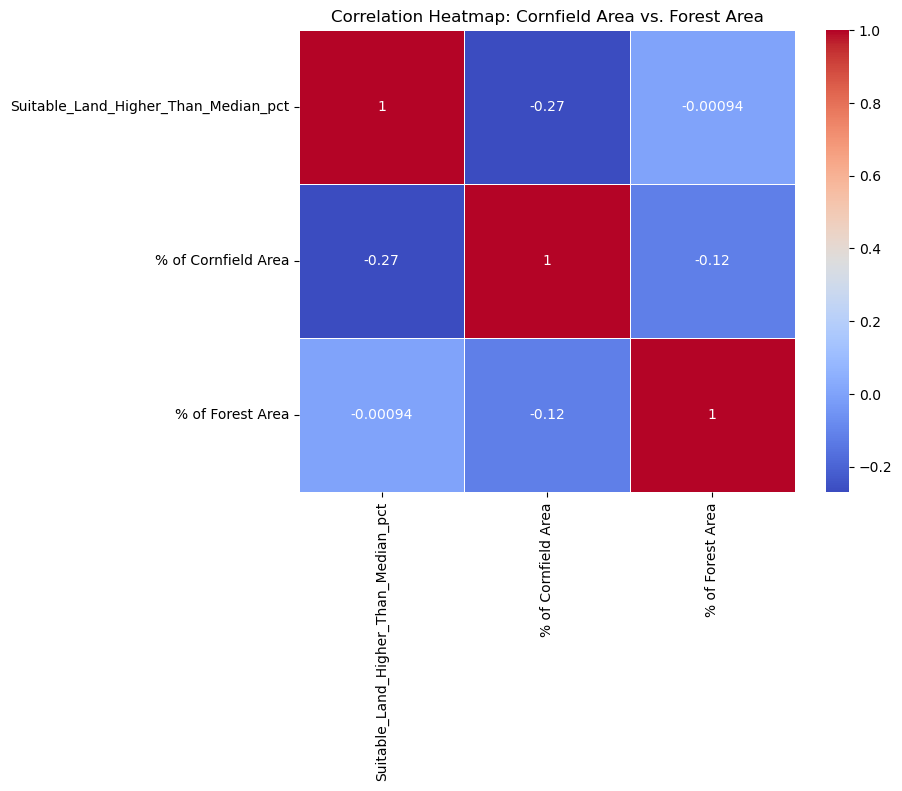

In [407]:
df_features = last_df[['Suitable_Land_Higher_Than_Median_pct','% of Cornfield Area', '% of Forest Area']]

# Calculating the correlation matrix
correlation_matrix = df_features.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Display the plot
plt.title('Correlation Heatmap: Cornfield Area vs. Forest Area')
plt.show()

In [408]:

import plotly.express as px
fig_box = px.box(last_df,                                           # Specify data frame
                 y=['% of Cornfield Area'],                       # Select posrecip and negrecip variables
                 points="all",                                     # Include all observations as data points
                 color = 'Suitable_Land_Higher_Than_Median_pct',                                # Color (and group by) column "Cluster"
                 labels = {"Cluster": "Altruism"},                 # Rename "Cluster" as "Altruism" in our legend
                 title = """Cornfield Area for land size bigger than median 
                 <br>(Higher than median: 1.0; Lower than median: 0.0)""")       # Always add a title!
fig_box.update_layout(autosize=False, width = 800)                # Specify width (by default, full notebook cell)
fig_box


c:\Users\Mert\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [409]:

fig_box = px.box(last_df,                                           # Specify data frame
                 y=['% of Forest Area'],                       # Select posrecip and negrecip variables
                 points="all",                                     # Include all observations as data points
                 color = 'Suitable_Land_Higher_Than_Median',                                # Color (and group by) column "Cluster"
                 labels = {"Cluster": "Altruism"},                 # Rename "Cluster" as "Altruism" in our legend
                 title = """Forest Area for land size bigger than median 
                 <br>(Higher than median: 1.0; Lower than median: 0.0)""")       # Always add a title!
fig_box.update_layout(autosize=False, width = 800)                # Specify width (by default, full notebook cell)
fig_box


c:\Users\Mert\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [410]:
print(np.percentile(last_df['% of Cornfield Area'], 25), last_df['% of Cornfield Area'].median(), np.percentile(last_df['% of Cornfield Area'], 75))

0.3728601524703652 1.1683432365057662 2.750325456967577


In [411]:
print(np.percentile(last_df['% of Forest Area'], 25), last_df['% of Forest Area'].median(), np.percentile(last_df['% of Forest Area'], 75))

16.110015721788884 30.576213375499833 42.96999895446617


In [412]:

#reg for non normalized rates
import statsmodels.api as sm
X = sm.add_constant(last_df[['% of Cornfield Area']])

# Dependent variable (Y)
Y = last_df['% of Forest Area']

# Fit the OLS regression model
ols_model = sm.OLS(Y, X).fit(cov_type='HC3')

# Display the OLS regression results
ols_results_extended = ols_model.summary()
ols_results_extended


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       % of Forest Area   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     63.38
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           2.97e-15
Time:                        15:29:14   Log-Likelihood:                -7984.8
No. Observations:                1826   AIC:                         1.597e+04
Df Residuals:                    1824   BIC:                         1.598e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  33.1968      0.603     55.019      0.000      32.014      34.379
% of Cornfield Area    -0.6449      0.081     -7.961      0.000      -0.804      -0.486
==============================================================================
Omnibus:                       51.216   Durbin-Watson:                   0.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.321
Skew:                           0.401   Prob(JB):                     9.71e-13
Kurtosis:                       3.288   Cond. No.                         5.32
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

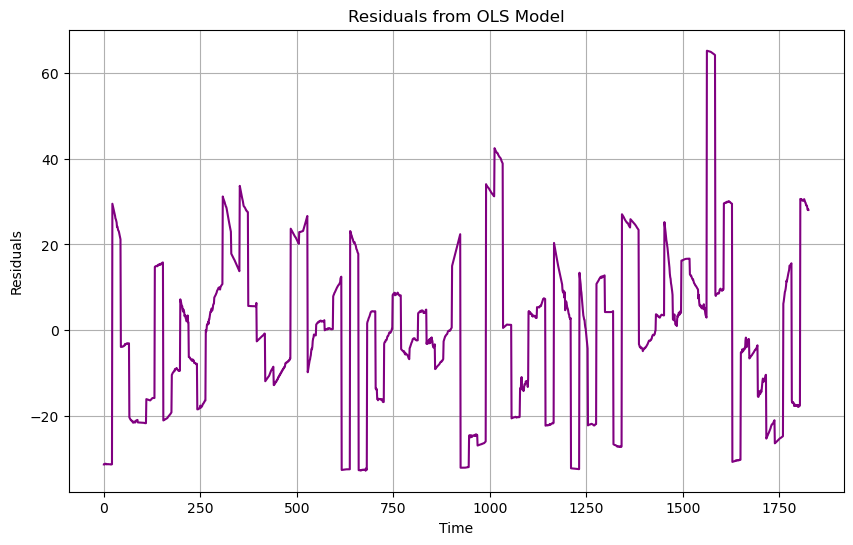

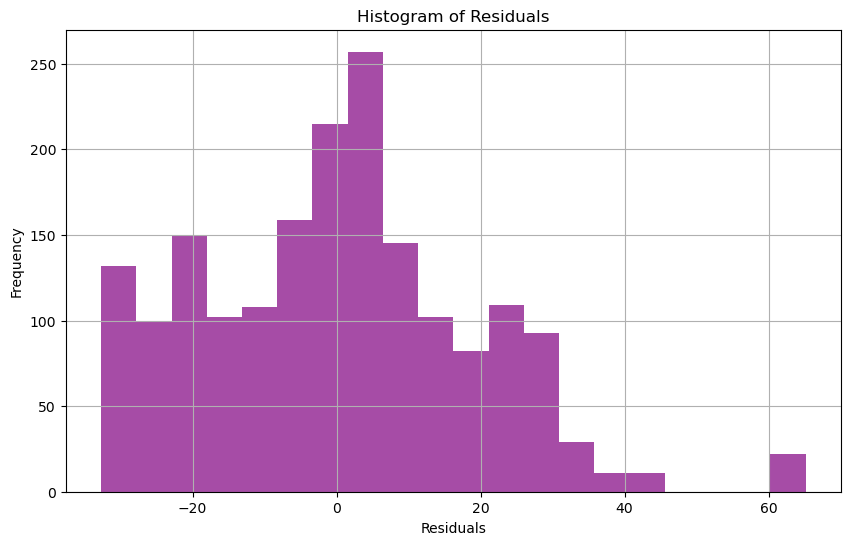

In [413]:

residuals = ols_model.resid
# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals", color="purple")
plt.title("Residuals from OLS Model")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Plot the histogram of residuals to check for normality
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color="purple", alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


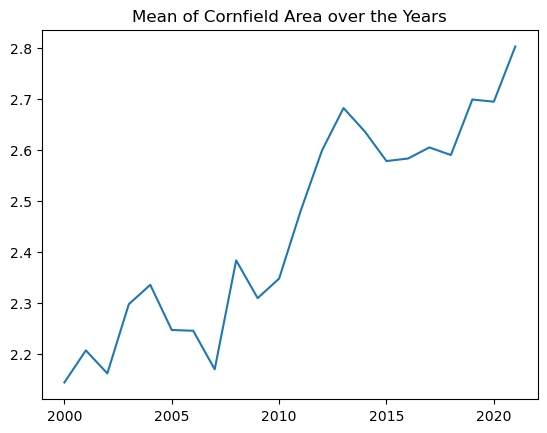

In [414]:

df_avg_globalyear = pd.DataFrame(last_df.groupby("Year")['% of Cornfield Area'].mean()).reset_index()
#df_avg_globalyear['iso3'] = df_avg_globalyear['country'].apply(get_iso3)
plt.figure()
plt.plot(df_avg_globalyear['Year'], df_avg_globalyear['% of Cornfield Area'])
plt.title('Mean of Cornfield Area over the Years')
plt.show()


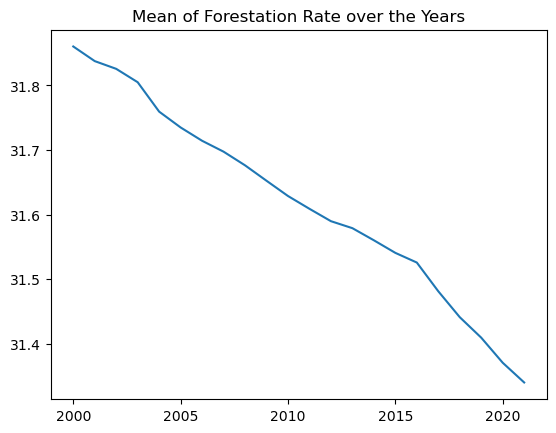

In [415]:
df_avg_globalyear = pd.DataFrame(last_df.groupby("Year")['% of Forest Area'].mean()).reset_index()
#df_avg_globalyear['iso3'] = df_avg_globalyear['country'].apply(get_iso3)
plt.figure()
plt.plot(df_avg_globalyear['Year'], df_avg_globalyear['% of Forest Area'])
plt.title('Mean of Forestation Rate over the Years')
plt.show()

### Autres - tests d'autocorrélation

In [416]:

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


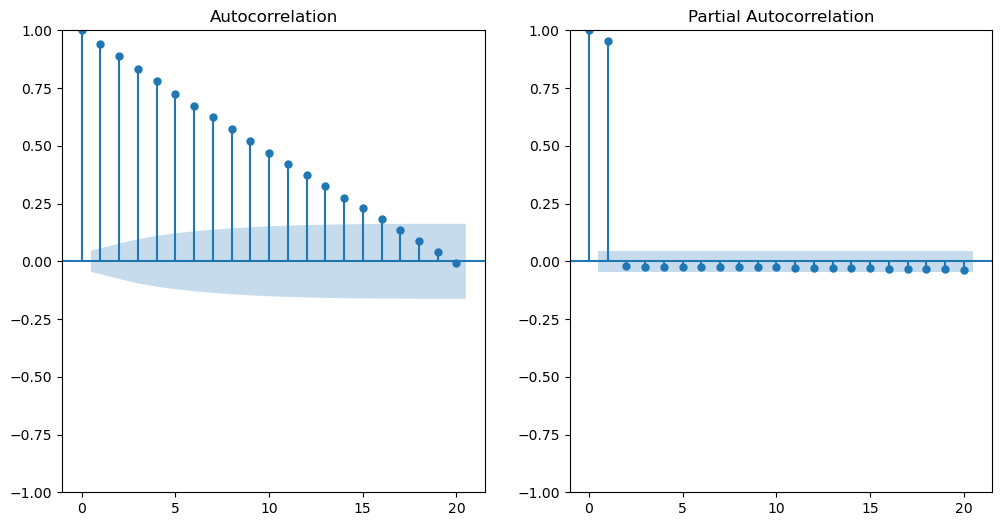

In [417]:

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(last_df['% of Cornfield Area'], lags=20, ax=plt.gca())  # ACF plot
plt.subplot(122)
plot_pacf(last_df['% of Forest Area'], lags=20, ax=plt.gca())  # PACF plot
plt.show()


In [418]:

aic_values = []
bic_values = []
max_lag = 20  # Maximum number of lags to test

for lag in range(1, max_lag + 1):
    model = sm.tsa.AutoReg(last_df['% of Cornfield Area'], lag).fit()
    aic_values.append(model.aic)
    bic_values.append(model.bic)

# Step 3: Choose the lag with the lowest AIC or BIC
optimal_lag_aic = aic_values.index(min(aic_values)) + 1
optimal_lag_bic = bic_values.index(min(bic_values)) + 1

print(f"Optimal lag based on AIC: {optimal_lag_aic}")
print(f"Optimal lag based on BIC: {optimal_lag_bic}")


Optimal lag based on AIC: 20
Optimal lag based on BIC: 1


In [419]:

print(sm.tsa.AutoReg(last_df['% of Cornfield Area'], 20).fit().aic,
sm.tsa.AutoReg(last_df['% of Cornfield Area'], 16).fit().bic)


5788.348927802609 5902.029417832267


In [420]:

from statsmodels.stats.diagnostic import acorr_ljungbox

# Assuming 'time_series_data' is your time series
# Fit an ARIMA model (or AR, ARMA based on your needs)
model = sm.tsa.ARIMA(last_df['% of Cornfield Area'], order=(4, 0, 0))  # p, d, q are your chosen ARIMA orders
fitted_model = model.fit()

# Get the residuals from the fitted model
residuals = fitted_model.resid

# Apply the Ljung-Box test on the residuals
ljung_box_results = acorr_ljungbox(residuals, lags=[4], return_df=True)

# Print the results
print(ljung_box_results)
print(fitted_model.summary())


    lb_stat  lb_pvalue
4  2.676479   0.613337
                                SARIMAX Results                                
Dep. Variable:     % of Cornfield Area   No. Observations:                 1826
Model:                  ARIMA(4, 0, 0)   Log Likelihood               -2921.202
Date:                 Wed, 27 Nov 2024   AIC                           5854.404
Time:                         15:29:18   BIC                           5887.464
Sample:                              0   HQIC                          5866.599
                                - 1826                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4229      0.841      2.880      0.004       0.774       4.072
ar.L1          0.9199      0.024     38.827      0.000       0.874       0.96

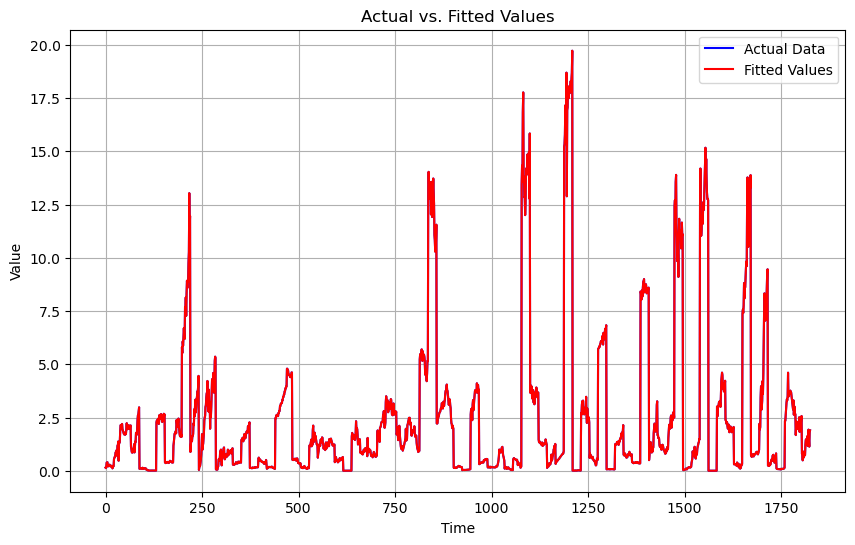

In [421]:

model = sm.tsa.ARIMA(last_df['% of Cornfield Area'], order=(4, 0, 0))  # p, d, q are your chosen ARIMA orders
fitted_model = model.fit()

# Forecast or predict the in-sample values (fitted values)
fitted_values = fitted_model.fittedvalues

# Plot the actual data and the fitted values
plt.figure(figsize=(10, 6))
plt.plot(last_df['% of Cornfield Area'], label="Actual Data", color="blue")
plt.plot(last_df['% of Cornfield Area'], label="Fitted Values", color="red")
plt.title("Actual vs. Fitted Values")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


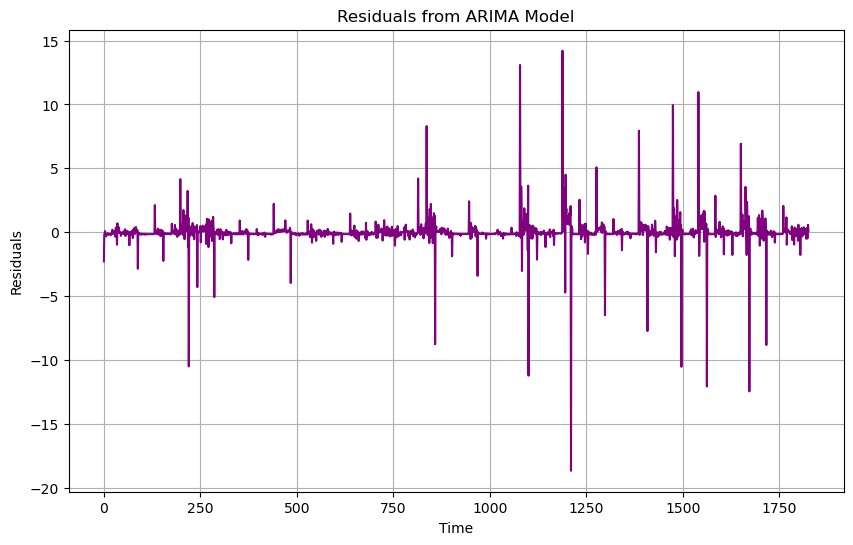

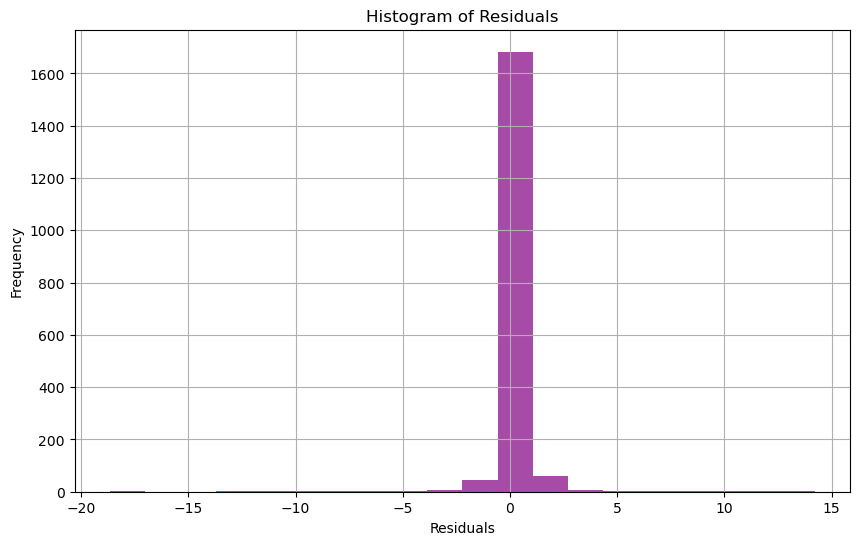

In [422]:

residuals = fitted_model.resid

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals", color="purple")
plt.title("Residuals from ARIMA Model")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Plot the histogram of residuals to check for normality
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color="purple", alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


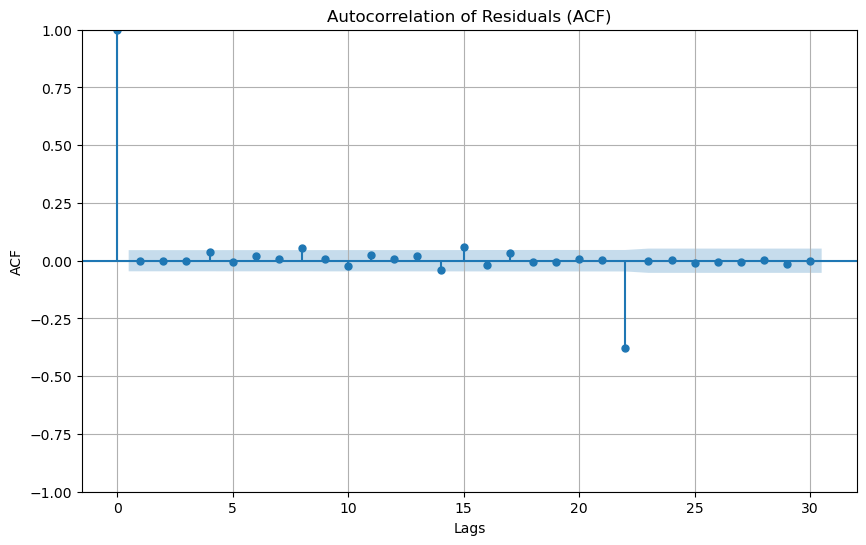

      lb_stat  lb_pvalue
10  10.371947   0.408489


In [423]:

ljung_box_results = acorr_ljungbox(residuals, lags=[10], return_df=True)

# Plot ACF of residuals
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=30, ax=plt.gca())
plt.title("Autocorrelation of Residuals (ACF)")
plt.xlabel("Lags")
plt.ylabel("ACF")
plt.grid(True)
plt.show()

# Print Ljung-Box test results
print(ljung_box_results)


## Multiple Linear Regressions

<Axes: xlabel='Suitable_Land_Higher_Than_Median'>

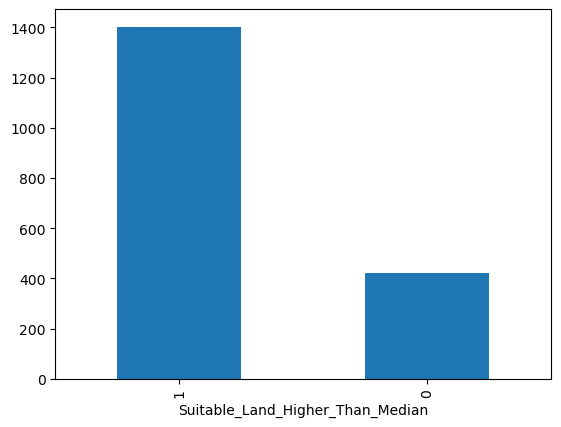

In [424]:
last_df["Suitable_Land_Higher_Than_Median"].value_counts().plot(kind = "bar")

In [425]:
reg_data = last_df.drop(columns = ["Country_x","Country_y"],axis = 1)
reg_data.head()

,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Country,Element,Tree-covered areas in sq km,...,Average_Temperature,Rain(mm per year),country,ElevationAverageElevationMeters,Suitable_Land_Higher_Than_Median,Demeaned_Cornfield_Area,Demeaned_Forest_Area,Suitable_Land_Higher_Than_Median_pct,Demeaned_Cornfield_Area_pct,Demeaned_Forest_Area_pct
0,2000,652230.0,AFG,96000.0,960.0,1.852782,0.147187,Afghanistan,Area from CCI_LC,12281.1,...,12.586175,327.0,Afghanistan,1884.0,1,-514.690455,1.818989e-12,1,-0.078912,-2.220446e-16
1,2001,652230.0,AFG,80000.0,800.0,1.852782,0.122656,Afghanistan,Area from CCI_LC,11975.3,...,13.413867,327.0,Afghanistan,1884.0,1,-674.690455,1.818989e-12,1,-0.103444,-2.220446e-16
2,2002,652230.0,AFG,100000.0,1000.0,1.852782,0.153320,Afghanistan,Area from CCI_LC,11851.1,...,13.051083,327.0,Afghanistan,1884.0,1,-474.690455,1.818989e-12,1,-0.072780,-2.220446e-16
3,2003,652230.0,AFG,250000.0,2500.0,1.852782,0.383300,Afghanistan,Area from CCI_LC,11735.3,...,12.485457,327.0,Afghanistan,1884.0,1,1025.309545,1.818989e-12,1,0.157201,-2.220446e-16
4,2004,652230.0,AFG,250000.0,2500.0,1.852782,0.383300,Afghanistan,Area from CCI_LC,11667.1,...,13.233360,327.0,Afghanistan,1884.0,1,1025.309545,1.818989e-12,1,0.157201,-2.220446e-16


### Multivariable Linear Regression Equation

The regression equation from the results is:

$$
\hat{Y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3
$$

Where:
- $\hat{Y}$: Predicted % of Forest Area
- $X_1$: % of Cornfield Area
- $X_2$: Average Temperature
- $X_3$: Corn price per bushel
- $\beta_0, \beta_1, \beta_2, \beta_3$: Coefficients from the regression model.



In [426]:
#Multivariable regression /w Temperature_Change
ind_x = reg_data[["% of Cornfield Area","Average_Temperature","Corn_Price_Per_Bushel"]]

dep_y = reg_data["% of Forest Area"]

# Add constant to the independent variables for the intercept in regression
ind_x = sm.add_constant(ind_x)

# Fit the linear regression model
model = sm.OLS(dep_y, ind_x).fit()

# Display the regression results
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       % of Forest Area   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     19.91
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           1.07e-12
Time:                        15:29:23   Log-Likelihood:                -7968.1
No. Observations:                1826   AIC:                         1.594e+04
Df Residuals:                    1822   BIC:                         1.597e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    27.8852      1.632     17.086      0.000      24.684      31.086
% of Cornfield Area      -0.7026      0.127     -5.551      0.000      -0.951      -0.454
Average_Temperature       0.3277      0.057      5.794      0.000       0.217       0.439
Corn_Price_Per_Bushel    -0.0245      0.313     -0.078      0.938      -0.639       0.590
==============================================================================
Omnibus:                       21.104   Durbin-Watson:                   0.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.514
Skew:                           0.260   Prob(JB):                     2.13e-05
Kurtosis:                       3.113   Cond. No.                         71.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multivariable Linear Regression Equation

The regression equation from the results is:

$$
\hat{Y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3
$$

Where:
- $\hat{Y}$: Predicted % of Forest Area
- $X_1$: % of Cornfield Area
- $X_2$: % Land available
- $X_3$: **Interaction variable** between **% of Cornfield Area** and **Suitable Land Higher Than Median**
- $\beta_0, \beta_1, \beta_2, \beta_3$: Coefficients from the regression model.



In [427]:
#Multivariable regression /w Temperature_Change
ind_x = reg_data[["% of Cornfield Area","% Land available"]]
ind_x["Interaction variable"] = reg_data["Suitable_Land_Higher_Than_Median"]*ind_x["% of Cornfield Area"]

dep_y = reg_data["% of Forest Area"]

# Add constant to the independent variables for the intercept in regression
ind_x = sm.add_constant(ind_x)

# Fit the linear regression model
model = sm.OLS(dep_y, ind_x).fit()

# Display the regression results
model_summary = model.summary()
model_summary

C:\Users\Mert\AppData\Local\Temp\ipykernel_15376\1476864895.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       % of Forest Area   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     111.4
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           3.26e-66
Time:                        15:29:23   Log-Likelihood:                -7843.8
No. Observations:                1826   AIC:                         1.570e+04
Df Residuals:                    1822   BIC:                         1.572e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   42.4471      0.739     57.416      0.000      40.997      43.897
% of Cornfield Area     -1.5459      0.162     -9.542      0.000      -1.864      -1.228
% Land available       -20.9609      1.203    -17.429      0.000     -23.320     -18.602
Interaction variable     0.7077      0.200      3.536      0.000       0.315       1.100
==============================================================================
Omnibus:                        8.711   Durbin-Watson:                   0.123
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               10.901
Skew:                           0.054   Prob(JB):                      0.00429
Kurtosis:                       3.363   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multivariable Linear Regression Equation

The regression equation from the results is:

$$
\hat{Y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + \beta_5 X_5
$$

Where:
- $\hat{Y}$: Predicted % of Forest Area
- $X_1$: % of Cornfield Area
- $X_2$: % Land available
- $X_3$: Average Temperature Change
- $X_4$: Corn price per bushel
- $X_5$: **Interaction variable** between **% of Cornfield Area** and **Suitable Land Higher Than Median**
- $\beta_0, \beta_1, \beta_2, \beta_3, \beta_4, \beta_5$: Coefficients from the regression model.



In [428]:
#Multivariable regression /w Temperature_Change
ind_x = reg_data[["% of Cornfield Area","% Land available","Temperature_Change","Corn_Price_Per_Bushel"]]
ind_x["Interaction variable"] = reg_data["Suitable_Land_Higher_Than_Median"]*ind_x["% of Cornfield Area"]

dep_y = reg_data["% of Forest Area"]

# Add constant to the independent variables for the intercept in regression
ind_x = sm.add_constant(ind_x)

# Fit the linear regression model
model = sm.OLS(dep_y, ind_x).fit()

# Display the regression results
model_summary = model.summary()
model_summary

C:\Users\Mert\AppData\Local\Temp\ipykernel_15376\4264964992.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       % of Forest Area   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     67.30
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           1.14e-64
Time:                        15:29:23   Log-Likelihood:                -7842.6
No. Observations:                1826   AIC:                         1.570e+04
Df Residuals:                    1820   BIC:                         1.573e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    41.3159      1.491     27.702      0.000      38.391      44.241
% of Cornfield Area      -1.5426      0.162     -9.500      0.000      -1.861      -1.224
% Land available        -21.0052      1.217    -17.258      0.000     -23.392     -18.618
Temperature_Change       -0.4804      0.775     -0.620      0.535      -2.000       1.039
Corn_Price_Per_Bushel     0.4308      0.296      1.457      0.145      -0.149       1.011
Interaction variable      0.6924      0.200      3.453      0.001       0.299       1.086
==============================================================================
Omnibus:                        8.667   Durbin-Watson:                   0.121
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               10.901
Skew:                           0.051   Prob(JB):                      0.00429
Kurtosis:                       3.365   Cond. No.                         22.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multivariable Linear Regression Equation

The regression equation from the results is:

$$
\hat{Y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + \beta_5 X_5 + \beta_6 X_6 + \beta_7 X_7
$$

Where:
- $\hat{Y}$: Predicted % of Forest Area
- $X_1$: % of Cornfield Area
- $X_2$: % Land available
- $X_3$: Average Temperature
- $X_4$: Corn price per bushel
- $X_5$: Rainfall (mm per year)
- $X_6$: Altitude (meters)
- $X_7$: **Interaction variable** between **% of Cornfield Area** and **Suitable Land Higher Than Median**
- $\beta_0, \beta_1, \beta_2, \beta_3, \beta_4, \beta_5$: Coefficients from the regression model.



In [429]:
#Multivariable regression /w Average_Temperature
ind_x = reg_data[["% of Cornfield Area","% Land available","Average_Temperature","Corn_Price_Per_Bushel","Rain(mm per year)","ElevationAverageElevationMeters"]]
ind_x["Interaction variable"] = reg_data["Suitable_Land_Higher_Than_Median"]*ind_x["% of Cornfield Area"]

dep_y = reg_data["% of Forest Area"]

# Add constant to the independent variables for the intercept in regression
ind_x = sm.add_constant(ind_x)

# Fit the linear regression model
model = sm.OLS(dep_y, ind_x).fit()

# Display the regression results
model_summary = model.summary()
model_summary

C:\Users\Mert\AppData\Local\Temp\ipykernel_15376\104138615.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       % of Forest Area   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     211.0
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.69e-229
Time:                        15:29:23   Log-Likelihood:                -7454.6
No. Observations:                1826   AIC:                         1.493e+04
Df Residuals:                    1818   BIC:                         1.497e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              28.1918      1.487     18.965      0.000      25.276      31.107
% of Cornfield Area                -1.3049      0.133     -9.838      0.000      -1.565      -1.045
% Land available                  -12.6845      1.058    -11.989      0.000     -14.760     -10.609
Average_Temperature                -0.4410      0.050     -8.907      0.000      -0.538      -0.344
Corn_Price_Per_Bushel               0.2316      0.238      0.973      0.331      -0.235       0.698
Rain(mm per year)                   0.0168      0.001     30.891      0.000       0.016       0.018
ElevationAverageElevationMeters    -0.0017      0.001     -2.672      0.008      -0.003      -0.000
Interaction variable                0.7562      0.167      4.535      0.000       0.429       1.083
==============================================================================
Omnibus:                       43.849   Durbin-Watson:                   0.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.349
Skew:                           0.246   Prob(JB):                     1.06e-14
Kurtosis:                       3.777   Cond. No.                     6.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""